In [ ]:
#Importo herramientas
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Para modelado RL, SVM
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# Para modelado LR, KNN, NB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Para modelos tipo Random Forest
from statsmodels.datasets import get_rdataset
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Para evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, mean_squared_error, r2_score

# Configuraciones adicionales para una mejor visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
# Ignorar warnings para una salida más limpia (opcional)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importo el df
df = pd.read_csv("winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
#Reviso la informacion de los tipos de variables con las que estoy ttratando, cantiddad, filas y columans
df.info()
print(f"\n filas y columnas: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

 filas y columnas: (1599, 12)


la cantidad de faltantes:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Axes: >

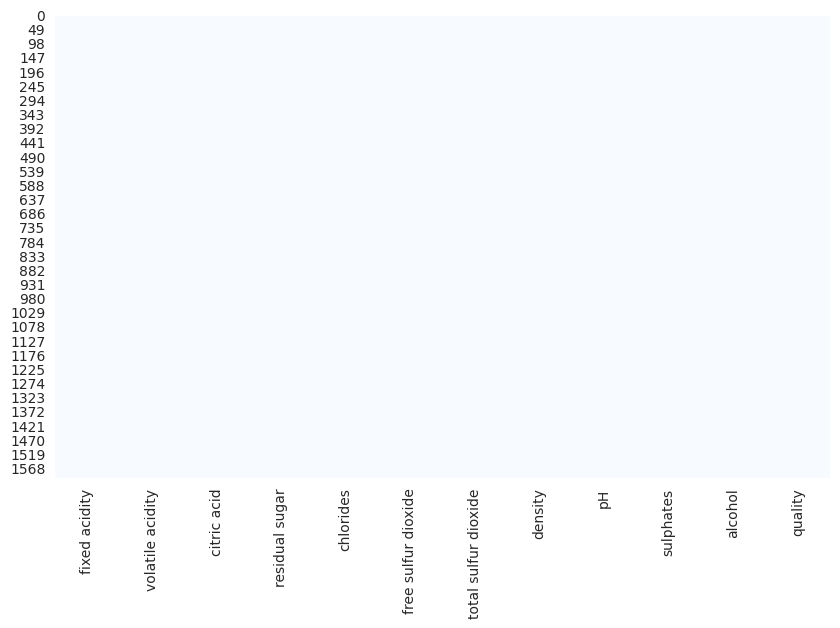

In [ ]:
#Analizo si hay datos vacios
print(f"la cantidad de faltantes:\n {df.isnull().sum()}")
#Grafico un heat map apra visualizar los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap= 'Blues')

El df se encuentra completo

Se puede plantear tanto como un  problema de clasificacion (haciendo feature engineering previamente) categorizando la calidad  del vino (target)  en  3 categorias (baja, media, alta) o en 2 categorias (malo, bueno), y tambien como modelo de regresion para una evaluacion cuantitativa.

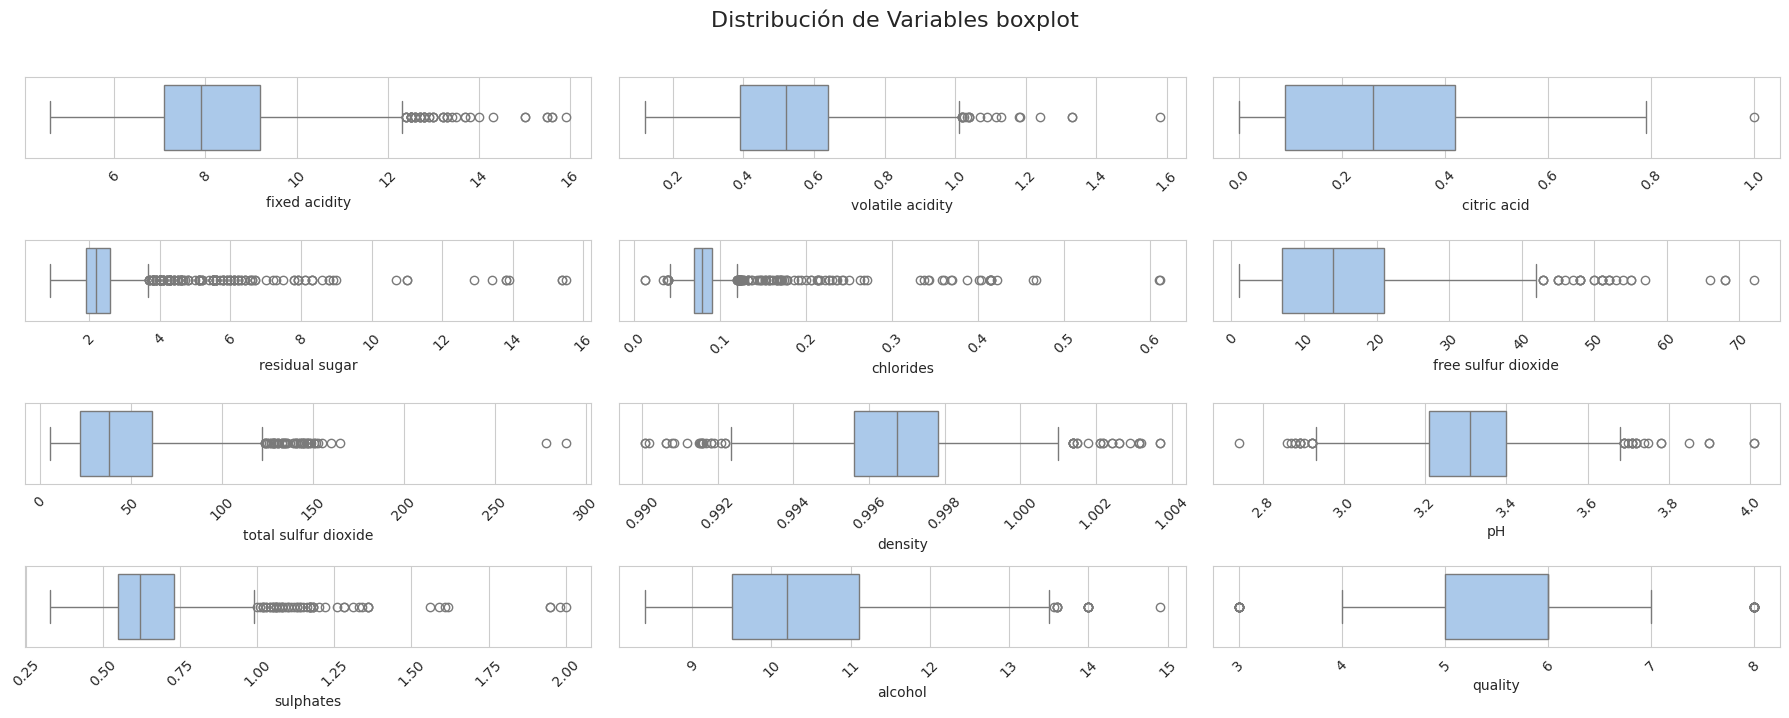

In [ ]:
#Visualizar variables en box-plt
# 1. Lista de columnas categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Configurar el layout de subgráficos (4 filas x 3 columnas)
fig, axes = plt.subplots(5, 3, figsize=(18, 8))  # Ajusta el tamaño según necesidad
fig.suptitle('Distribución de Variables boxplot', y=1.02, fontsize=16)

# 3. Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 4. Generar los gráficos
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], palette='pastel')

    axes[i].tick_params(axis='x', rotation=45)  # Rotación para etiquetas largas

# 5. Eliminar ejes vacíos si hay menos de 15 gráficos
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

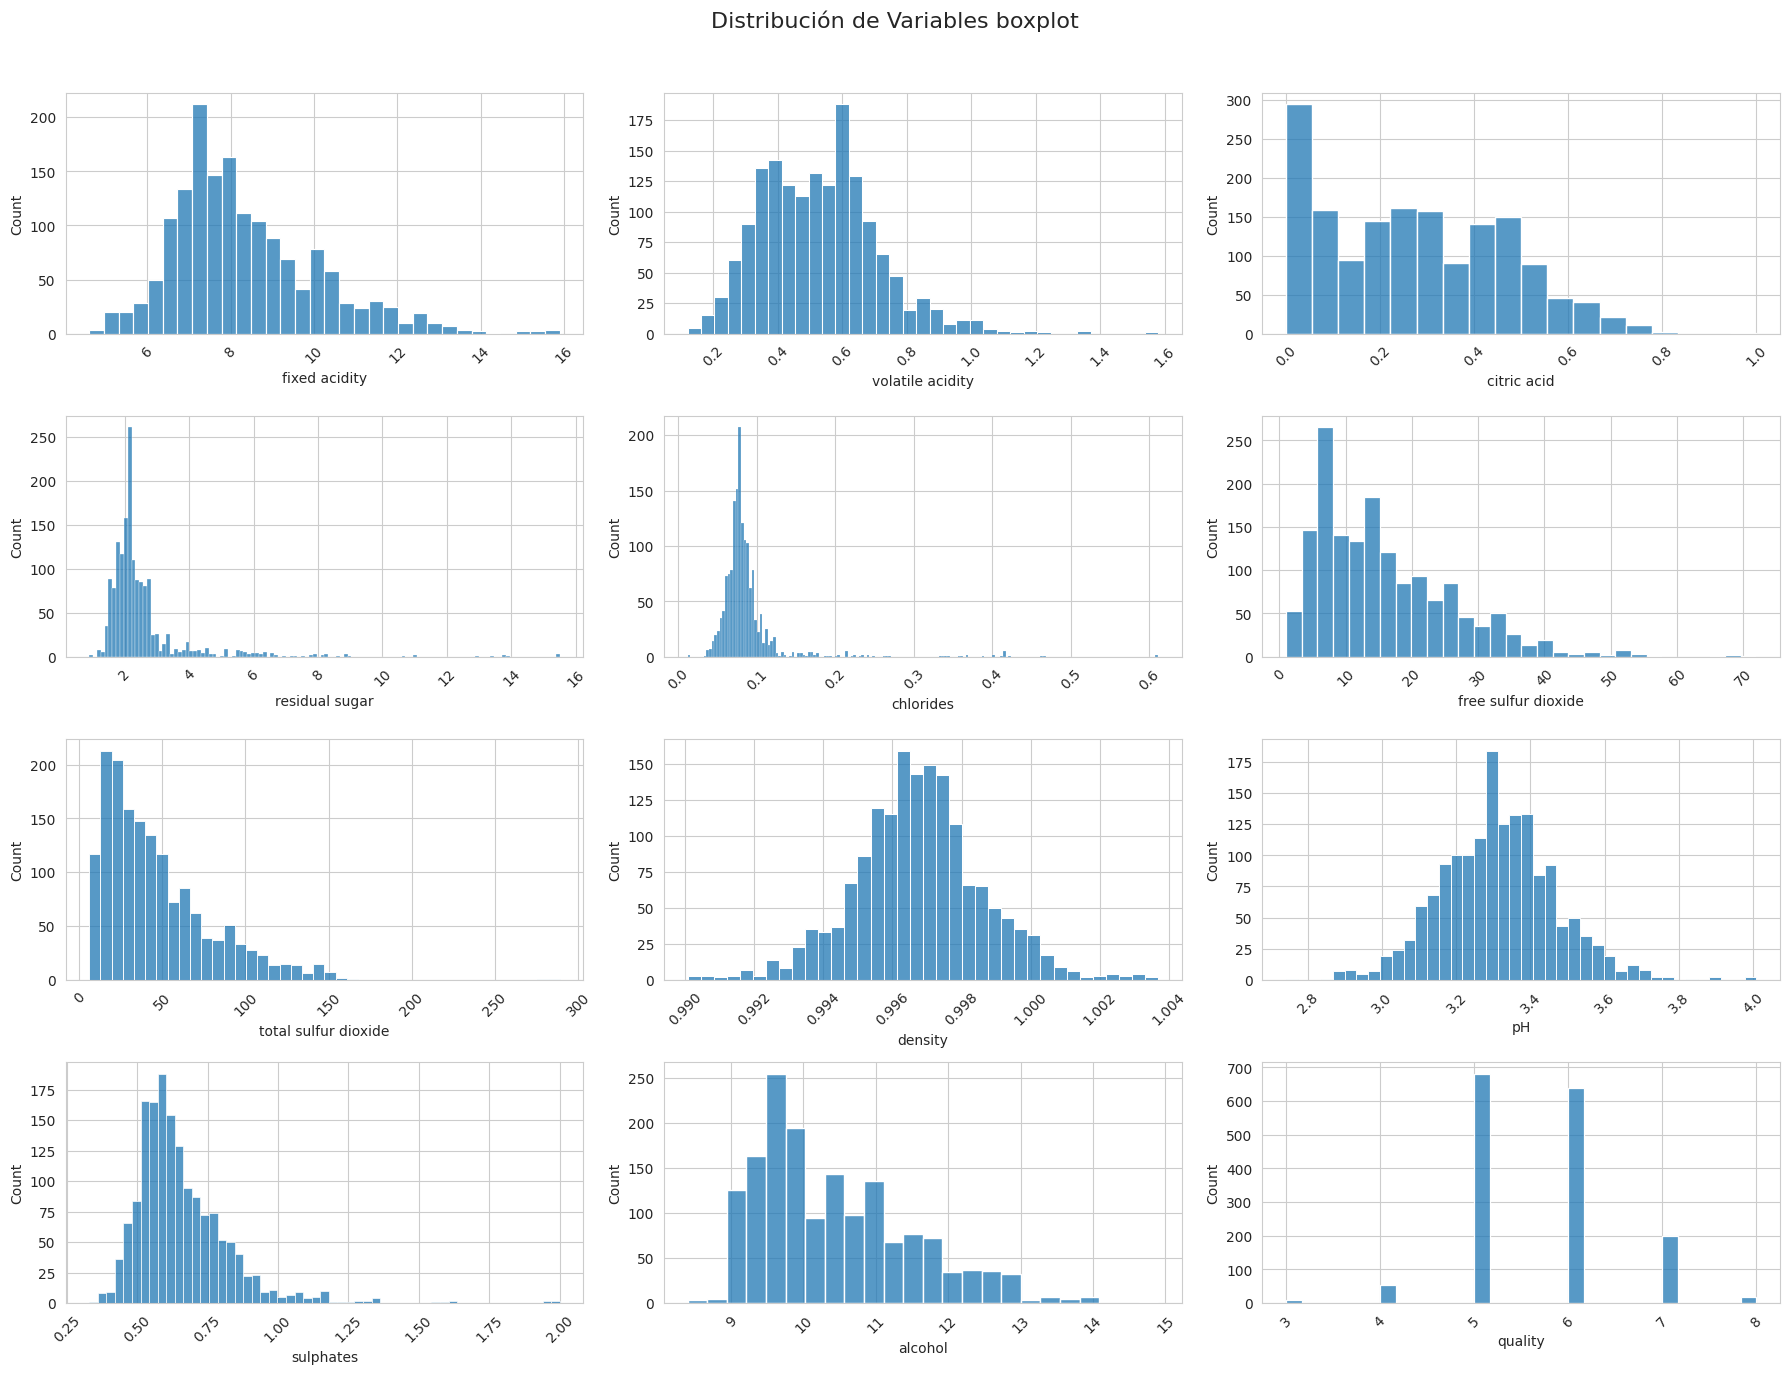

In [ ]:
#Visualizar variables en box-plt
# 1. Lista de columnas categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Configurar el layout de subgráficos (4 filas x 3 columnas)
fig, axes = plt.subplots(5, 3, figsize=(18, 16))  # Ajusta el tamaño según necesidad
fig.suptitle('Distribución de Variables boxplot', y=1.02, fontsize=16)

# 3. Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 4. Generar los gráficos
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=axes[i], palette='pastel')

    axes[i].tick_params(axis='x', rotation=45)  # Rotación para etiquetas largas

# 5. Eliminar ejes vacíos si hay menos de 15 gráficos
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Existen muchos valores atipicos en varias de las features que deberian ser tratados. El modelo de regression lineal necesitaria un mejor tratamiento de los datos (aplicando ya sea eliminando, imputando con la mediana, aplicando logaritmo, windsoring o discretizando). Para este caso realizar una discretizacion funcionaria de mejor forma para una clasificacion. En caso de realziar una regresion, se deberia probar con metodos los metodos anteriores, evitando la opcion de eliminacion (ya que esta opcion seria la ultima a tomar)

In [ ]:
#Visualizacion de las correlaciones entre las variables
# Matriz de correlación
correlation_matrix_df= df.corr()
#Visualizacion
sns.heatmap(correlation_matrix_df, annot=True, cmap="vlag", linewidths=0.5,fmt=".2f")
sns.pairplot(df)

Para encarar la regresion, voy a tomar las variables mas representativas para trabajar primero ajustando los outliners y despues verificando nuevamente mediante la correlacion, para posteriormente entrenar el modelo. **Las variables a tomar par al regresion seran volatile_acid, citric_acid, sulpahtes, alcohol y quality.**

In [ ]:
#Creo un nuevo dataset unicamente con las variables antes mencionadas
df_reg =df.copy()
df_reg.drop(["fixed acidity",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH"], axis=1, inplace=True)
df_reg

volatile acidity  citric acid  sulphates  alcohol  quality
0                0.700         0.00       0.56      9.4        5
1                0.880         0.00       0.68      9.8        5
2                0.760         0.04       0.65      9.8        5
3                0.280         0.56       0.58      9.8        6
4                0.700         0.00       0.56      9.4        5
...                ...          ...        ...      ...      ...
1594             0.600         0.08       0.58     10.5        5
1595             0.550         0.10       0.76     11.2        6
1596             0.510         0.13       0.75     11.0        6
1597             0.645         0.12       0.71     10.2        5
1598             0.310         0.47       0.66     11.0        6

[1599 rows x 5 columns]

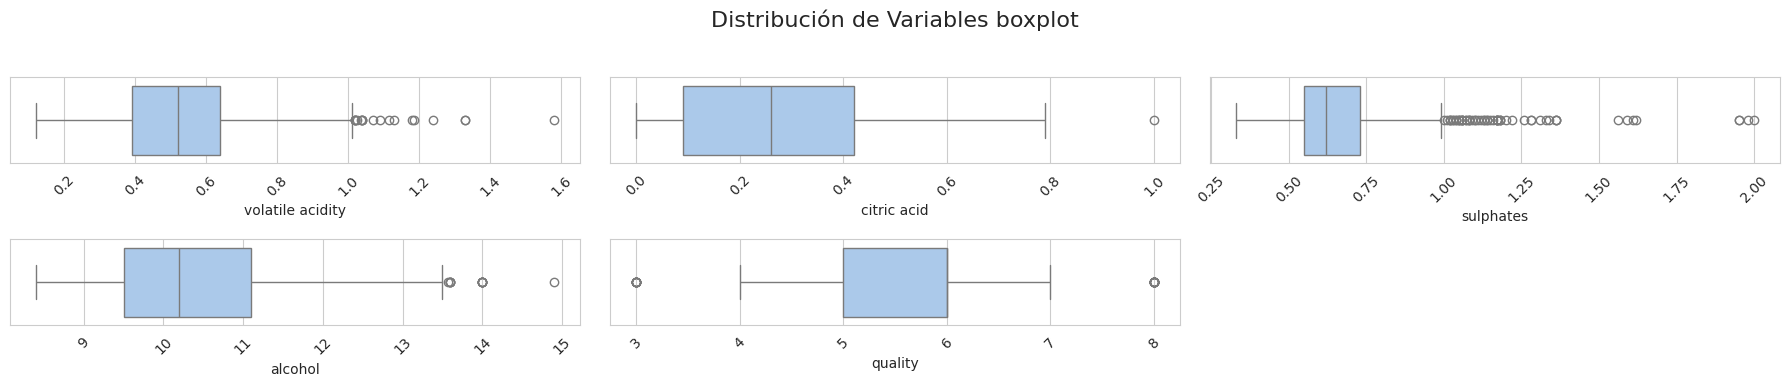

In [ ]:
#Visualizo nuevamente las variables
#Visualizar variables en box-plt
# 1. Lista de columnas categóricas
num_cols = df_reg.select_dtypes(include=['int64', 'float64']).columns

# 2. Configurar el layout de subgráficos (4 filas x 3 columnas)
fig, axes = plt.subplots(5, 3, figsize=(18, 8))  # Ajusta el tamaño según necesidad
fig.suptitle('Distribución de Variables boxplot', y=1.02, fontsize=16)

# 3. Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 4. Generar los gráficos
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_reg, x=col, ax=axes[i], palette='pastel')

    axes[i].tick_params(axis='x', rotation=45)  # Rotación para etiquetas largas

# 5. Eliminar ejes vacíos si hay menos de 15 gráficos
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


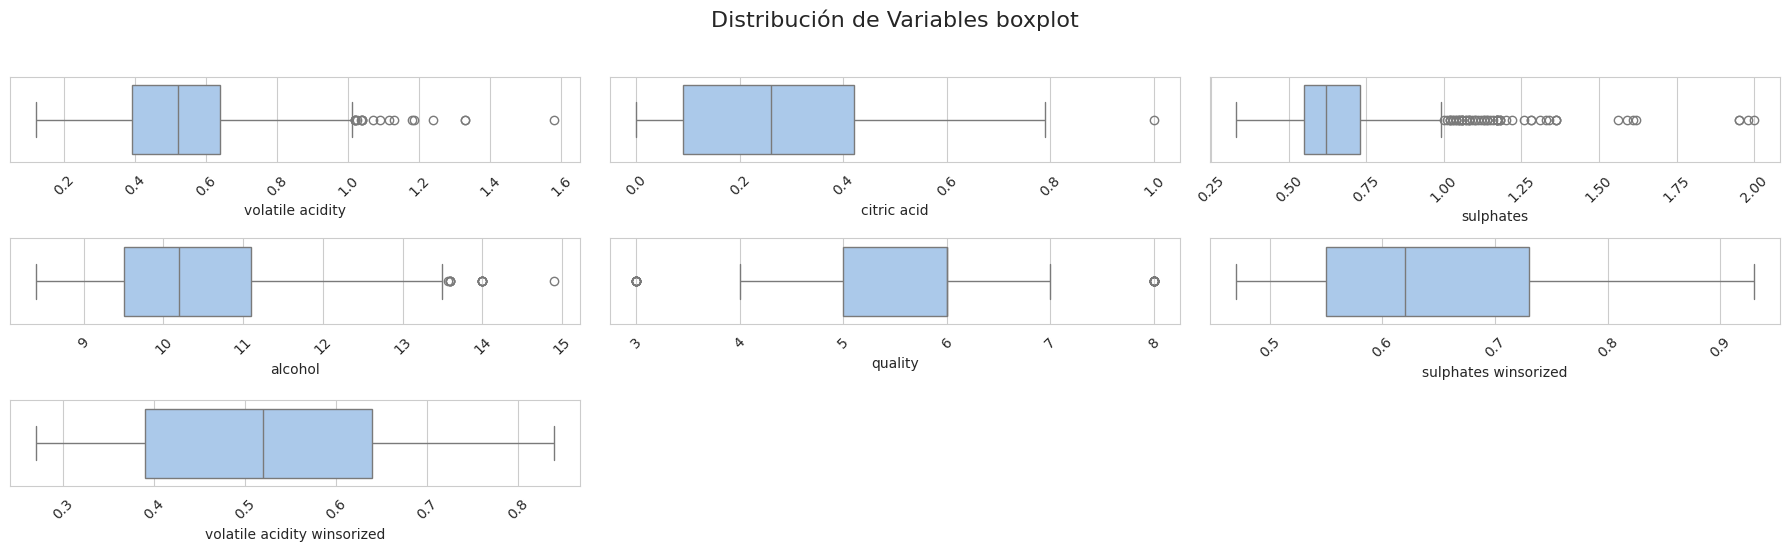

In [ ]:
#aplico windsorizacion en sulphates y volatile acidity acotando a los percentiles 5 y 95 (asi evito eliminar datos)
from scipy.stats.mstats import winsorize
df_reg['sulphates winsorized']= winsorize(df['sulphates'], limits=[0.05, 0.05])
df_reg['volatile acidity winsorized'] = winsorize(df['volatile acidity'], limits=[0.05, 0.05])

#Visualizo nuevamente las variables
#Visualizar variables en box-plt
# 1. Lista de columnas categóricas
num_cols = df_reg.select_dtypes(include=['int64', 'float64']).columns

# 2. Configurar el layout de subgráficos (4 filas x 3 columnas)
fig, axes = plt.subplots(5, 3, figsize=(18, 8))  # Ajusta el tamaño según necesidad
fig.suptitle('Distribución de Variables boxplot', y=1.02, fontsize=16)

# 3. Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 4. Generar los gráficos
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_reg, x=col, ax=axes[i], palette='pastel')

    axes[i].tick_params(axis='x', rotation=45)  # Rotación para etiquetas largas

# 5. Eliminar ejes vacíos si hay menos de 15 gráficos
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

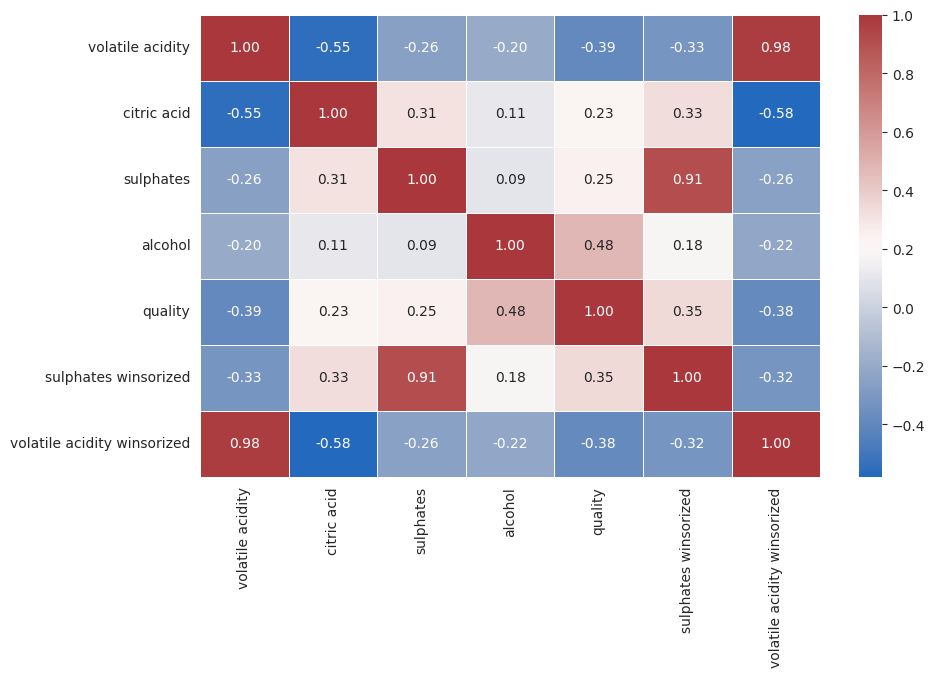

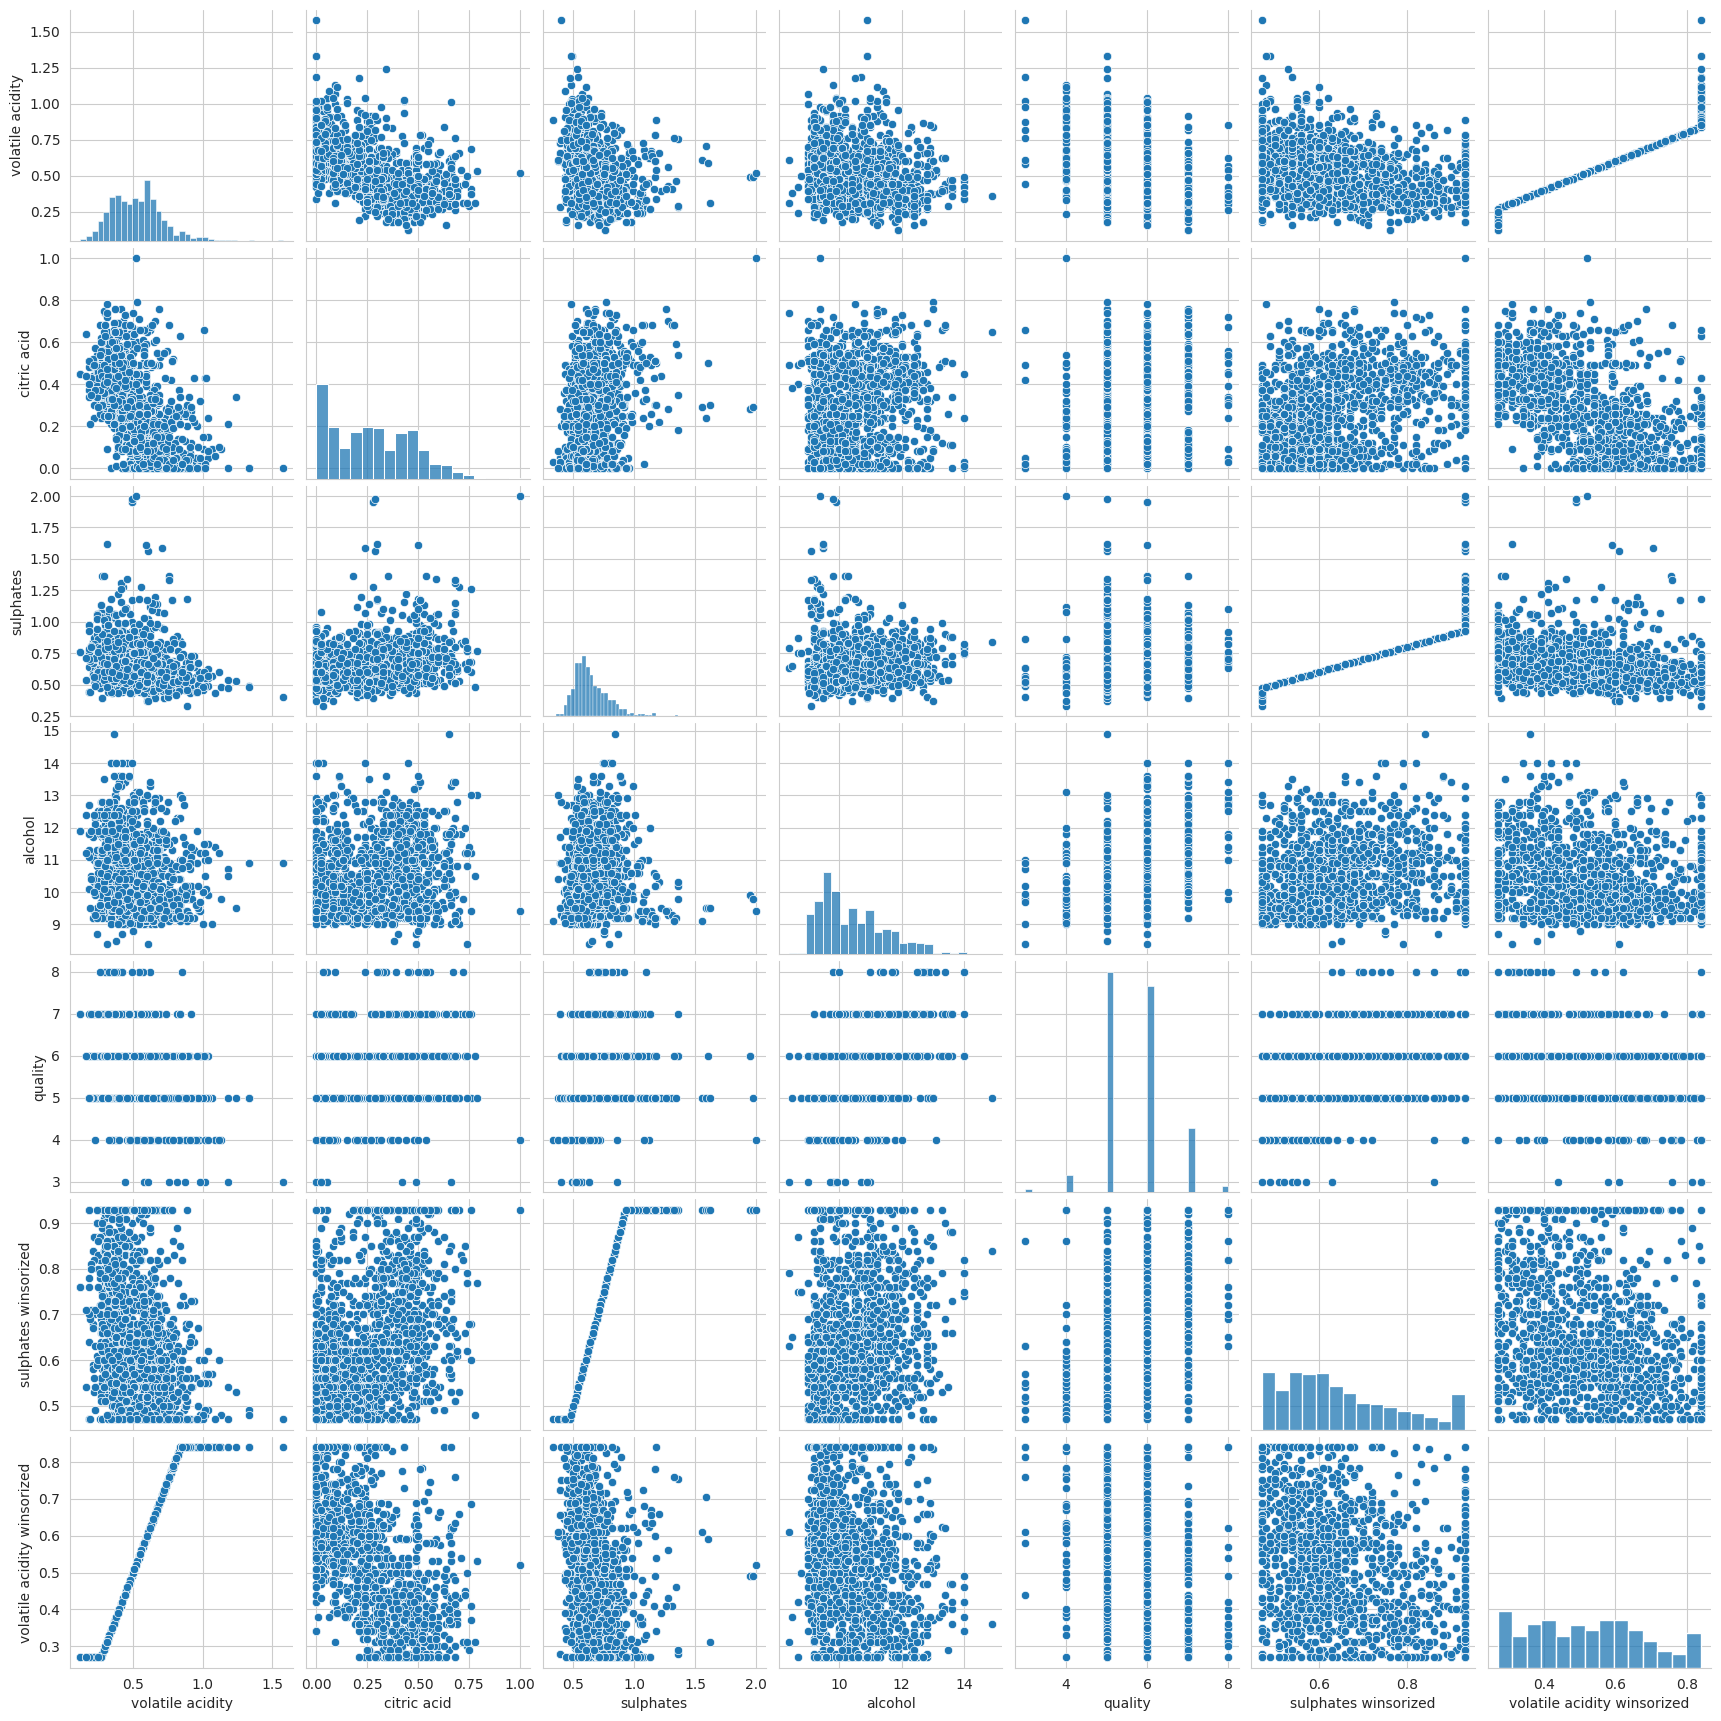

In [ ]:
#Realizo la matriz de correlacion y visualizacion
# Matriz de correlación
correlation_matrix_df_reg= df_reg.corr()
#Visualizacion
sns.heatmap(correlation_matrix_df_reg, annot=True, cmap="vlag", linewidths=0.5,fmt=".2f")
sns.pairplot(df_reg)

mejoro para la windsorizacion de sulphates, pero no para la de volatile acidity

**Pruebo ahora eliminado los datos, para ver si mejroa la correlacion**

In [ ]:
#ahora probar el modelo eliminando los datos atipicos de ambas
df_reg_del =df_reg.copy()

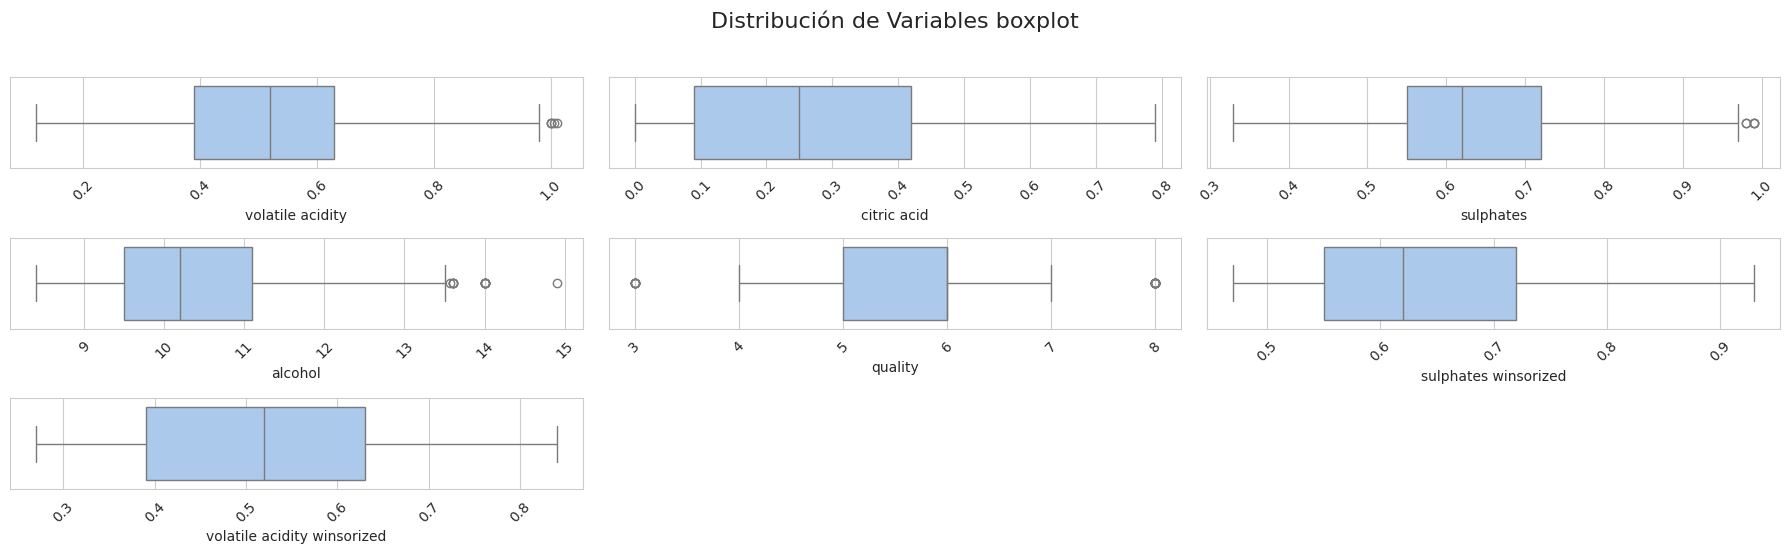

In [ ]:
#Calculo Q1 (percentil 25%) y Q3 (percentil 75%)
Q1 = df_reg_del['volatile acidity'].quantile(0.25)
Q3 = df_reg_del['volatile acidity'].quantile(0.75)
#Calculo el IQR (Rango Intercuartílico)
IQR = Q3 - Q1
#Elimino los outliners
df_reg_del = df_reg_del[(df_reg_del['volatile acidity'] >= (Q1 - 1.5 * IQR)) & (df_reg_del['volatile acidity'] <= (Q3 + 1.5 * IQR))]


#Calculo Q1 (percentil 25%) y Q3 (percentil 75%)
Q1 = df_reg_del['sulphates'].quantile(0.25)
Q3 = df_reg_del['sulphates'].quantile(0.75)
#Calculo el IQR (Rango Intercuartílico)
IQR = Q3 - Q1
#Elimino los outliners
df_reg_del = df_reg_del[(df_reg_del['sulphates'] >= (Q1 - 1.5 * IQR)) & (df_reg_del['sulphates'] <= (Q3 + 1.5 * IQR))]


#Visualizo nuevamente las variables
#Visualizar variables en box-plt
# 1. Lista de columnas categóricas
num_cols = df_reg_del.select_dtypes(include=['int64', 'float64']).columns

# 2. Configurar el layout de subgráficos (4 filas x 3 columnas)
fig, axes = plt.subplots(5, 3, figsize=(18, 8))  # Ajusta el tamaño según necesidad
fig.suptitle('Distribución de Variables boxplot', y=1.02, fontsize=16)

# 3. Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 4. Generar los gráficos
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_reg_del, x=col, ax=axes[i], palette='pastel')

    axes[i].tick_params(axis='x', rotation=45)  # Rotación para etiquetas largas

# 5. Eliminar ejes vacíos si hay menos de 15 gráficos
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df_reg_del.info()
df_reg_del.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1521 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volatile acidity             1521 non-null   float64
 1   citric acid                  1521 non-null   float64
 2   sulphates                    1521 non-null   float64
 3   alcohol                      1521 non-null   float64
 4   quality                      1521 non-null   int64  
 5   sulphates winsorized         1521 non-null   float64
 6   volatile acidity winsorized  1521 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 95.1 KB


(1521, 7)

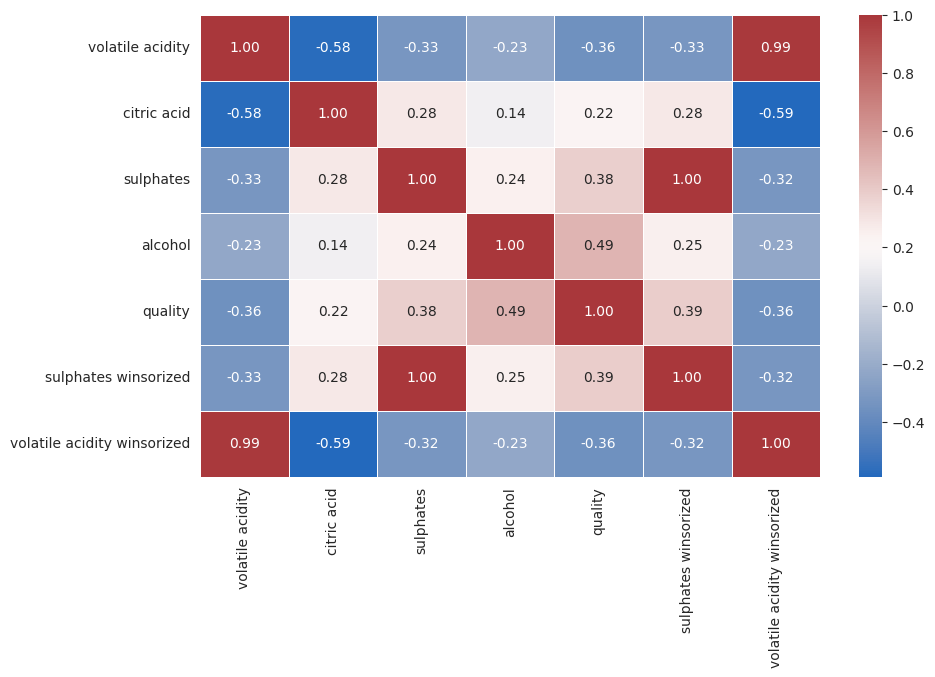

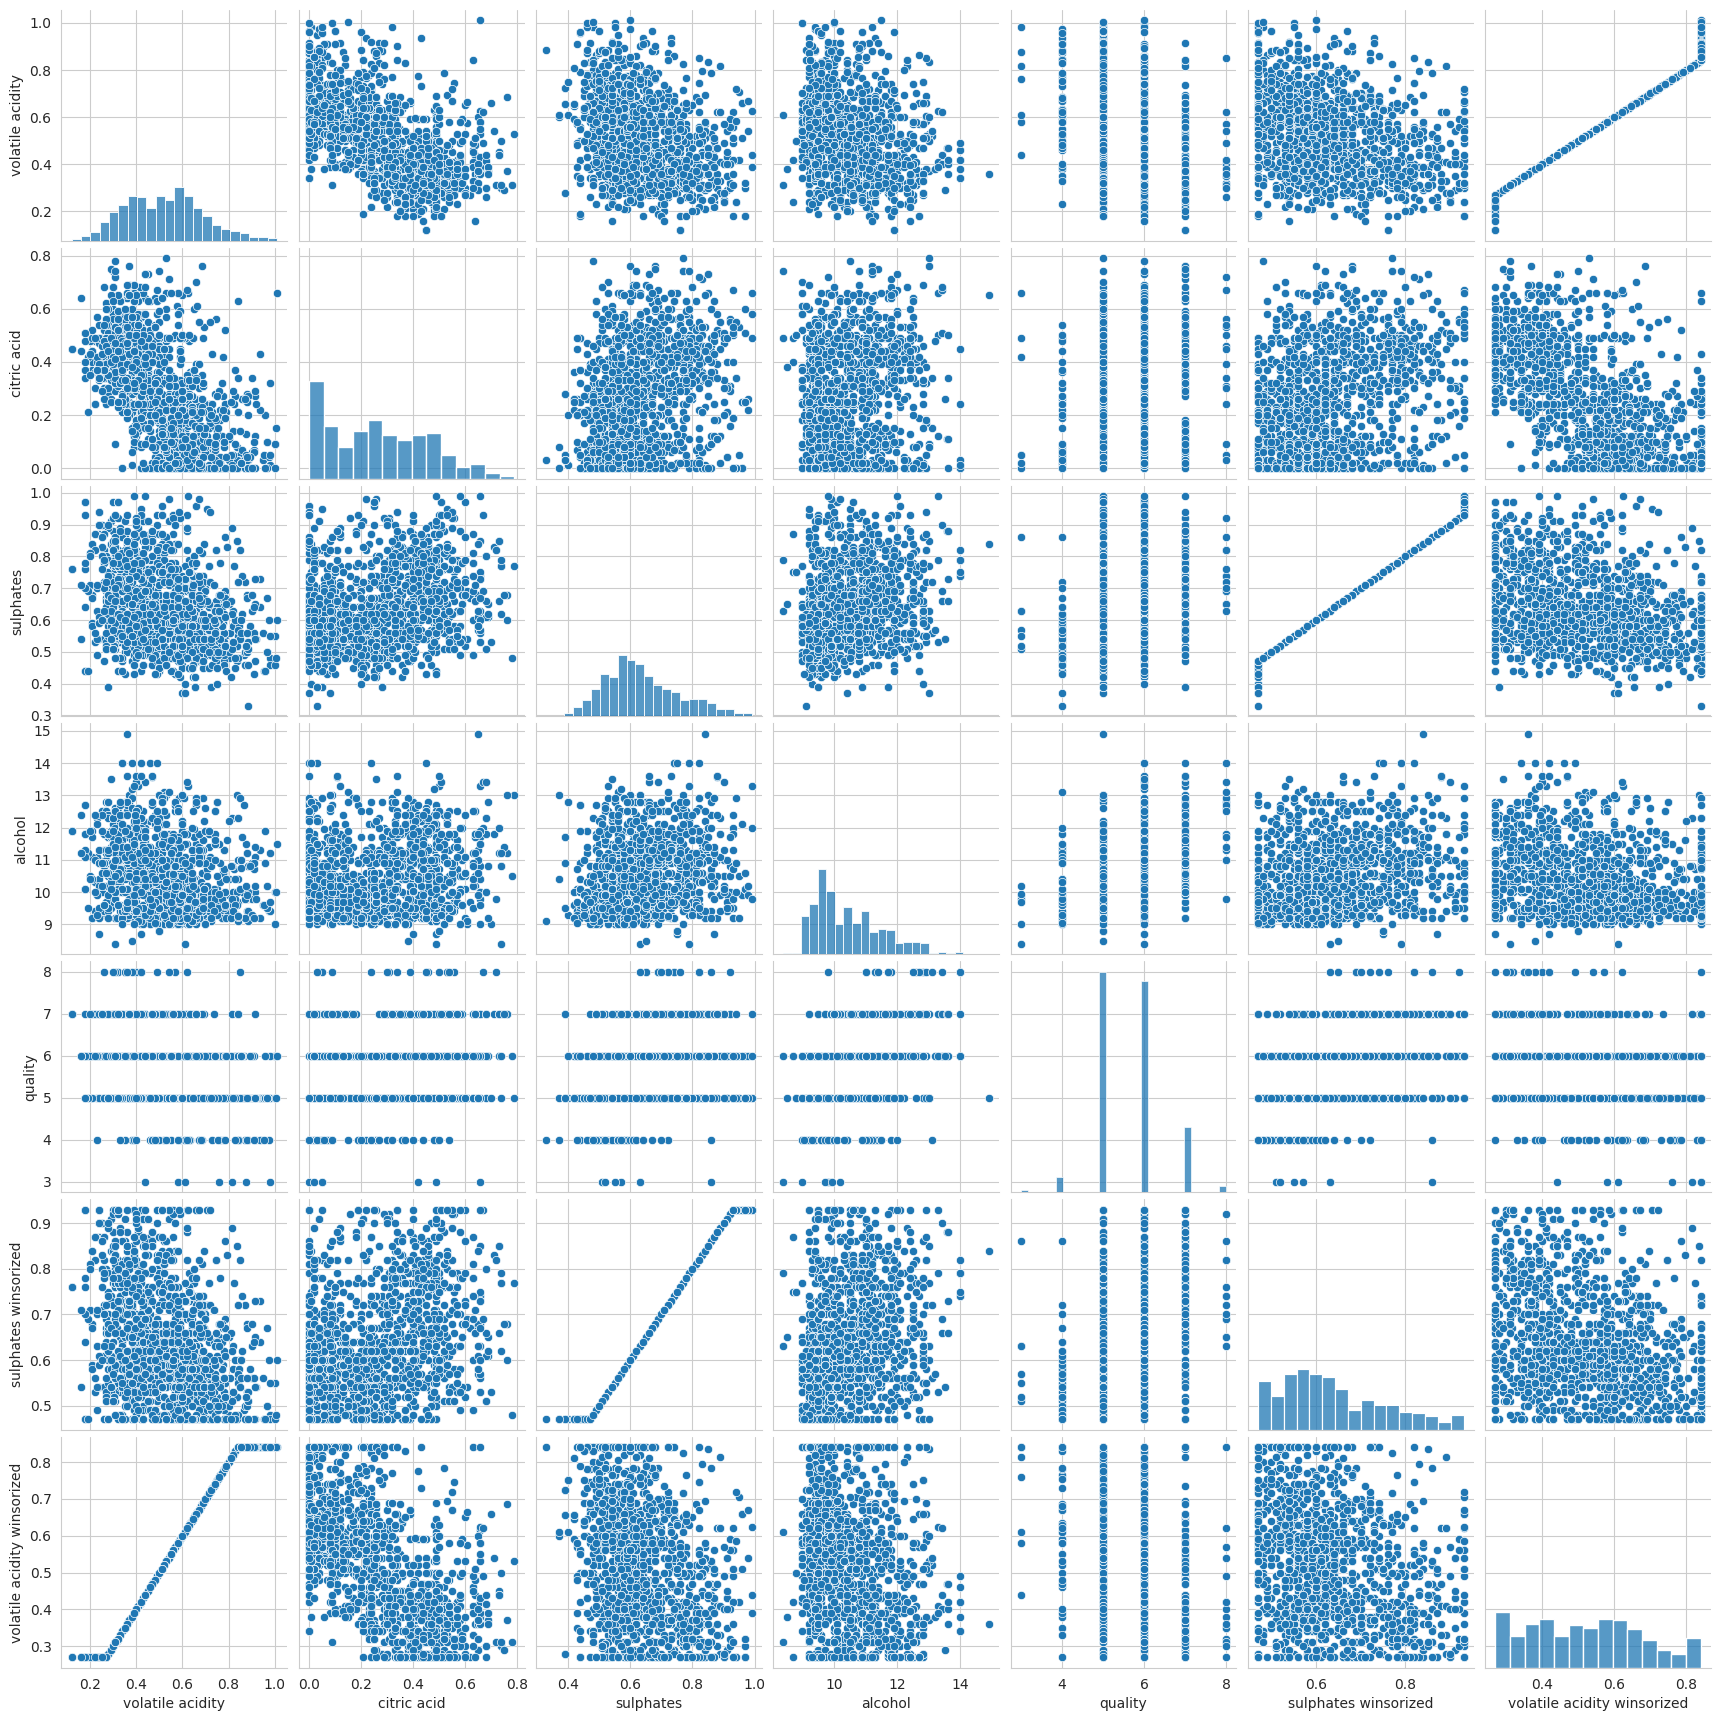

In [ ]:
#Realizo la matriz de correlacion y visualizacion
# Matriz de correlación
correlation_matrix_df_reg_del= df_reg_del.corr()
#Visualizacion
sns.heatmap(correlation_matrix_df_reg_del, annot=True, cmap="vlag", linewidths=0.5,fmt=".2f")
sns.pairplot(df_reg_del)

La variacion es minima eliminando datos, asi que me quedo con la windsorizacion como metodologia para trabajar con los outliners.

In [ ]:
df_reg.head()

volatile acidity  citric acid  sulphates  alcohol  quality  \
0              0.70         0.00       0.56      9.4        5   
1              0.88         0.00       0.68      9.8        5   
2              0.76         0.04       0.65      9.8        5   
3              0.28         0.56       0.58      9.8        6   
4              0.70         0.00       0.56      9.4        5   

   sulphates winsorized  volatile acidity winsorized  
0                  0.56                         0.70  
1                  0.68                         0.84  
2                  0.65                         0.76  
3                  0.58                         0.28  
4                  0.56                         0.70

In [ ]:
#Genero el dataset con el que voy a trabajar para la el modelo de regresion
df_reg_RL=df_reg.copy()
df_reg_RL.head()

volatile acidity  citric acid  sulphates  alcohol  quality  \
0              0.70         0.00       0.56      9.4        5   
1              0.88         0.00       0.68      9.8        5   
2              0.76         0.04       0.65      9.8        5   
3              0.28         0.56       0.58      9.8        6   
4              0.70         0.00       0.56      9.4        5   

   sulphates winsorized  volatile acidity winsorized  
0                  0.56                         0.70  
1                  0.68                         0.84  
2                  0.65                         0.76  
3                  0.58                         0.28  
4                  0.56                         0.70

In [ ]:
df_reg_RL.drop(["volatile acidity", "sulphates"], axis=1, inplace=True)
df_reg_RL.head()

citric acid  alcohol  quality  sulphates winsorized  \
0         0.00      9.4        5                  0.56   
1         0.00      9.8        5                  0.68   
2         0.04      9.8        5                  0.65   
3         0.56      9.8        6                  0.58   
4         0.00      9.4        5                  0.56   

   volatile acidity winsorized  
0                         0.70  
1                         0.84  
2                         0.76  
3                         0.28  
4                         0.70

# Modelo de Regresion Lineal

In [ ]:
#Entrenar el modelo

#Variables x e y
X=df_reg_RL.drop("quality", axis=1)
Y=df_reg_RL["quality"]

#Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print('---------Modelo entrenado---------')
print(f"-----Coeficientes: {model.coef_}")
print(f"-----Intercepto: {model.intercept_}")

#Crear un DataFrame con los coeficientes y sus variables asociadas
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})

print(coeficientes)

#Obtener las predicciones
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluación del modelo en el conjunto de prueba:")
print(f"Raíz del Error Cuadrático Medio (MSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

---------Modelo entrenado---------
-----Coeficientes: [-0.22750756  0.30631063  1.28554903 -1.24060795]
-----Intercepto: 2.31447418885769
                      Variable  Coeficiente
0                  citric acid    -0.227508
1                      alcohol     0.306311
2         sulphates winsorized     1.285549
3  volatile acidity winsorized    -1.240608

Evaluación del modelo en el conjunto de prueba:
Raíz del Error Cuadrático Medio (MSE): 0.65
Coeficiente de Determinación (R^2): 0.33


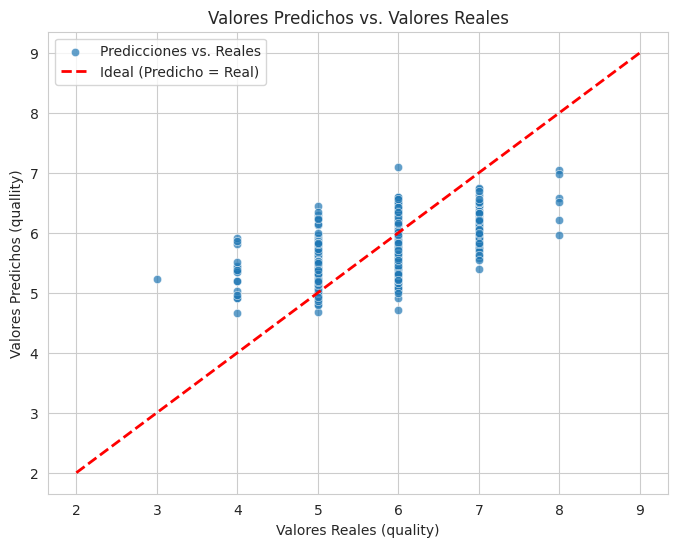

In [ ]:
plt.figure(figsize=(8, 6))

# 1. Gráfico de Dispersión: Valores Reales vs. Predichos
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label='Predicciones vs. Reales')

# 2. Línea de Identidad (y = x): El objetivo ideal
#    Esta línea representa el caso perfecto donde predicho == real.
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Creamos una secuencia de puntos entre el mínimo y el máximo
# para dibujar la línea diagonal perfectamente.
# Añadimos un pequeño margen para que la línea se vea bien.
ideal_line_x = np.linspace(min_val - 1, max_val + 1, 100)
ideal_line_y = ideal_line_x

plt.plot(ideal_line_x, ideal_line_y, color='red', linestyle='--', linewidth=2, label='Ideal (Predicho = Real)')

# --- Añadir etiquetas y título ---
plt.xlabel('Valores Reales (quality)')
plt.ylabel('Valores Predichos (quallity)')
plt.title('Valores Predichos vs. Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

El modelo presenta un R2 de 0.33, no es un buen ajuste cuantitativo. Un mejor modelado se podria realiza por  clasificacion, no tiene un sentido claro clasificarlo en funcion de una regresion por lo acotado de los valores y tambien al ser valores discretos.

<Axes: xlabel='quality_stdr', ylabel='count'>

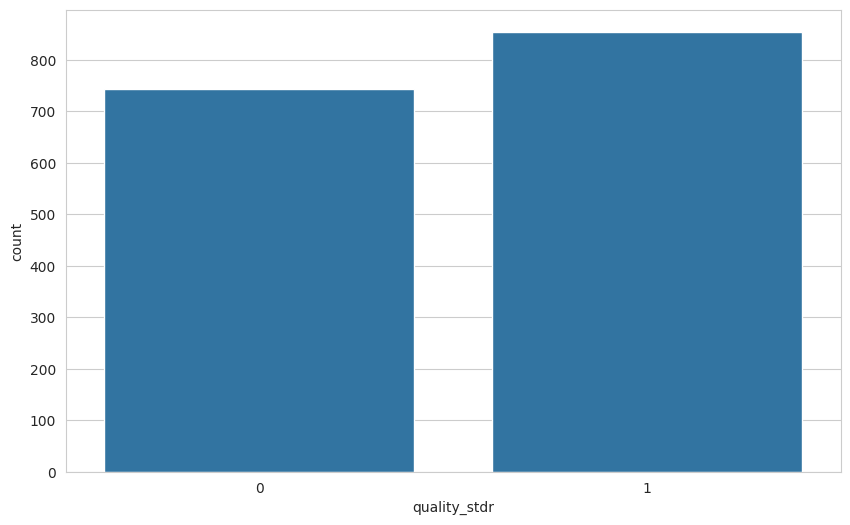

In [ ]:
#Transformo la variable target (quality) en categorica. Se manejaran 2 categorias (6, 7 y 8 con 1 "Quality A") y  (3, 4 y 5 con 0 "Quality B")
df_train= df.copy()
df_train["quality_stdr"]= np.where(df_train["quality"]>=6, 1, 0)
df_train['quality_stdr'] = df_train['quality_stdr'].astype('category')
df_train.head()
sns.countplot(data=df_train, x="quality_stdr")

las clases estan equilibradas

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_stdr          1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


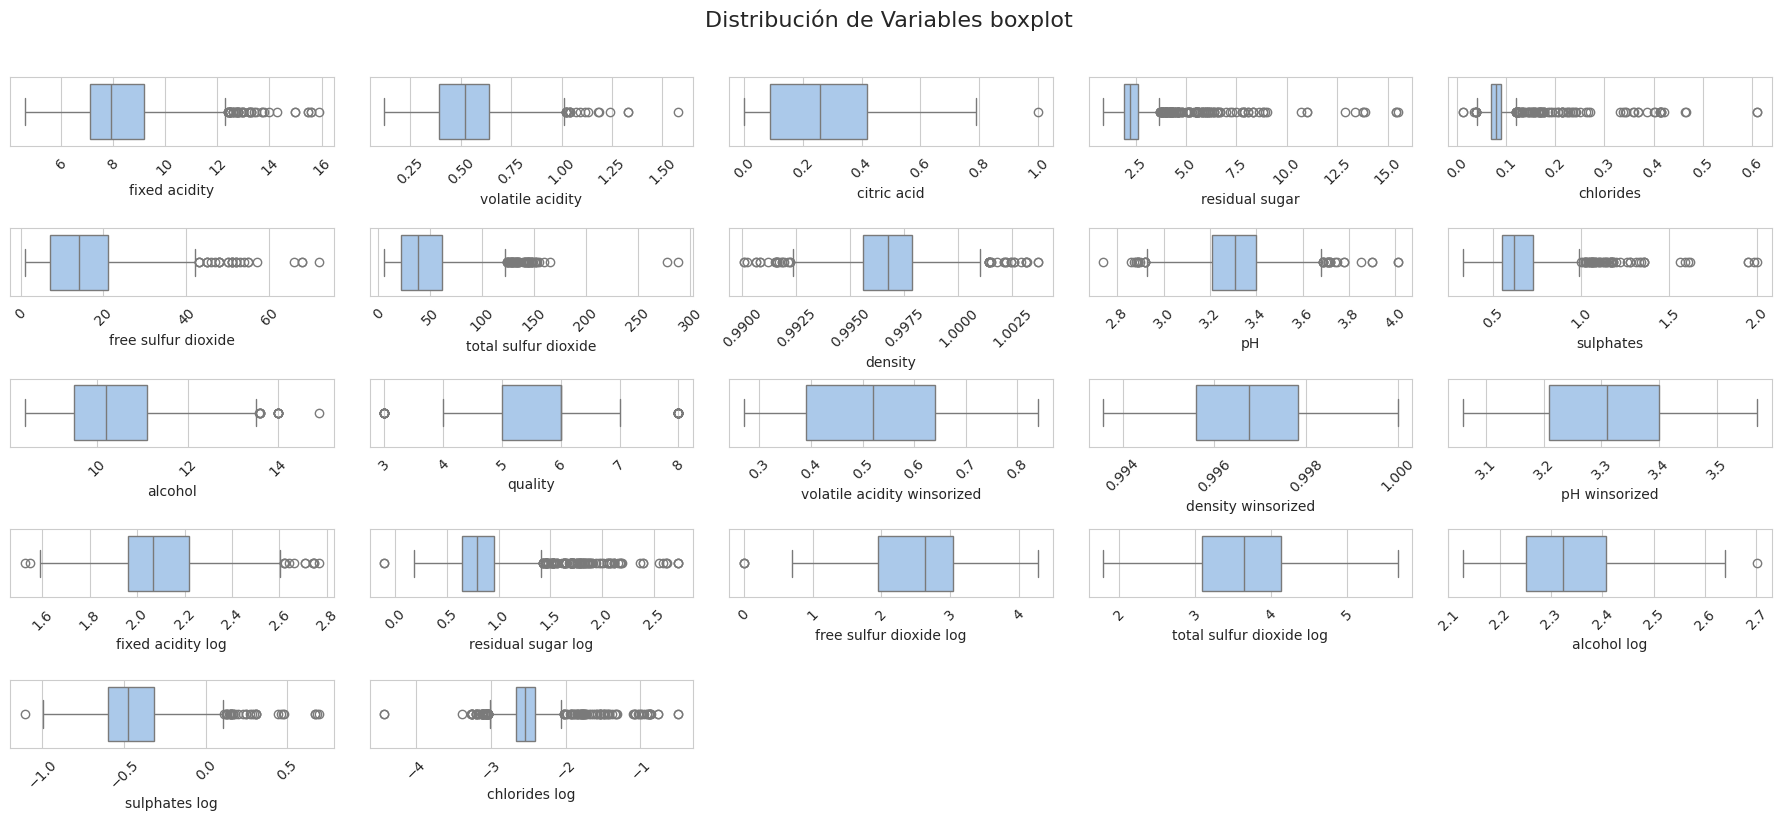

In [ ]:
#Para tratar los outliners visualizados en varias de las features se utilizara el metodo de windsoring
#aplico windsoring (dependiendo de que tan grave sea los outliners y la distribucion se apciara 1/99 o 5/95)
df_train['volatile acidity winsorized'] = winsorize(df_train['volatile acidity'], limits=[0.05, 0.05])
df_train['density winsorized'] = winsorize(df_train['density'], limits=[0.05, 0.05])
df_train['pH winsorized'] = winsorize(df_train['pH'], limits=[0.05, 0.05])

#df_train['sulphates winsorized'] = winsorize(df_train['sulphates'], limits=[0.01, 0.01])
#df_train['chlorides winsorized'] = winsorize(df_train['chlorides'], limits=[0.01, 0.01])


#aplico Log a variables con sesgo a la derecha
df_train['fixed acidity log'] = np.log(df_train['fixed acidity'])
df_train['residual sugar log'] = np.log(df_train['residual sugar'])
df_train['free sulfur dioxide log'] = np.log(df_train['free sulfur dioxide'])
df_train['total sulfur dioxide log'] = np.log(df_train['total sulfur dioxide'])
df_train['alcohol log'] = np.log(df_train['alcohol'])

df_train['sulphates log'] = np.log(df_train['sulphates'])
df_train['chlorides log'] = np.log(df_train['chlorides'])

#Visualizo nuevamente las variables
#Visualizar variables en box-plt
# 1. Lista de columnas categóricas
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

# 2. Configurar el layout de subgráficos (4 filas x 3 columnas)
fig, axes = plt.subplots(5, 5, figsize=(18, 8))  # Ajusta el tamaño según necesidad
fig.suptitle('Distribución de Variables boxplot', y=1.02, fontsize=16)

# 3. Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 4. Generar los gráficos
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_train, x=col, ax=axes[i], palette='pastel')

    axes[i].tick_params(axis='x', rotation=45)  # Rotación para etiquetas largas

# 5. Eliminar ejes vacíos si hay menos de 15 gráficos
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#elimino las columnas que ya no suman en el df_train
df_train_clean=df_train.copy()
df_train_clean.drop(["fixed acidity", "volatile acidity", "residual sugar", "chlorides",
                     "free sulfur dioxide", "total sulfur dioxide", "density", "pH",
                     "sulphates", "alcohol", "quality"], axis=1, inplace=True)
df_train_clean.head()

citric acid quality_stdr  volatile acidity winsorized  density winsorized  \
0         0.00            0                         0.70              0.9978   
1         0.00            0                         0.84              0.9968   
2         0.04            0                         0.76              0.9970   
3         0.56            1                         0.28              0.9980   
4         0.00            0                         0.70              0.9978   

   pH winsorized  fixed acidity log  residual sugar log  \
0           3.51           2.001480            0.641854   
1           3.20           2.054124            0.955511   
2           3.26           2.054124            0.832909   
3           3.16           2.415914            0.641854   
4           3.51           2.001480            0.641854   

   free sulfur dioxide log  total sulfur dioxide log  alcohol log  \
0                 2.397895                  3.526361     2.240710   
1                 3.218876                  4.204693     2.282382   
2                 2.708050                  3.988984     2.282382   
3                 2.833213                  4.094345     2.282382   
4                 2.397895                  3.526361     2.240710   

   sulphates log  chlorides log  
0      -0.579818      -2.577022  
1      -0.385662      -2.322788  
2      -0.430783      -2.385967  
3      -0.544727      -2.590267  
4      -0.579818      -2.577022

# Divido el dataset y realizo las transformaciones necesarias

In [ ]:
#Etiqueto el df en funcion de x e y
X = df_train_clean.drop("quality_stdr", axis=1)
y = df_train_clean["quality_stdr"]

#Divido el df para el entrenamiento 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Se escala los valores numericos mediante StandarScale (se puede usar RoboustScaler si hat muchos atipicos)
numeric_cols = ['citric acid', 'volatile acidity winsorized',
       'density winsorized', 'pH winsorized', 'fixed acidity log',
       'residual sugar log', 'free sulfur dioxide log',
       'total sulfur dioxide log', 'alcohol log', 'sulphates log',
       'chlorides log']
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train[numeric_cols]) # Ajustar y transformar training data
X_test_processed = scaler.transform(X_test[numeric_cols]) # Transformar test data (SOLO transform, NO fit_transform)


# Modelo de regesion logistica

Modelo de Regresión Logística Entrenado

--- Regresión Logística ---
Accuracy en el conjunto de validación: 0.7417
ROC AUC Score en el conjunto de validación: 0.8169

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       223
           1       0.78      0.72      0.75       257

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480


Confusion Matrix:
 [[170  53]
 [ 71 186]]
Clases en el modelo: [0 1]
Mapping: {0: np.int64(0), 1: np.int64(1)}


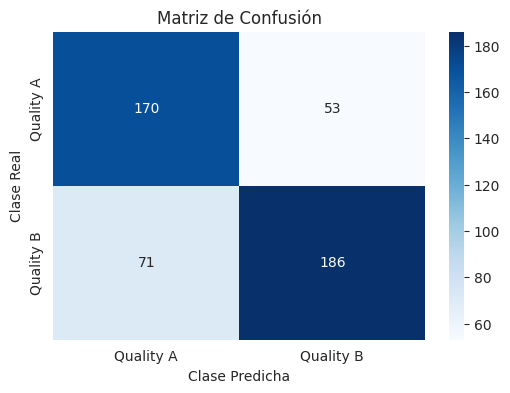

In [ ]:
#Modelado con Regresion logistica
model_reglog = LogisticRegression(class_weight='balanced', penalty='l2', solver='liblinear', random_state=42)
model_reglog.fit(X_train_processed, y_train)
print("Modelo de Regresión Logística Entrenado")

#Realizar predicciones en el conjunto de validación
y_pred_reglog = model_reglog.predict(X_test_processed)
y_pred_proba_reglog = model_reglog.predict_proba(X_test_processed)[:, 1] # Probabilidades para la clase positiva (1)

#Evaluo el modelo
print("\n--- Regresión Logística ---")
print(f"Accuracy en el conjunto de validación: {accuracy_score(y_test, y_pred_reglog):.4f}")
print(f"ROC AUC Score en el conjunto de validación: {roc_auc_score(y_test, y_pred_proba_reglog):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_reglog))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_reglog))


#Visualizacion de matriz de confusion
print("Clases en el modelo:", model_reglog.classes_)
print("Mapping:", dict(enumerate(model_reglog.classes_)))
cm = confusion_matrix(y_test, y_pred_reglog)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Quality A', 'Quality B'],
            yticklabels=['Quality A', 'Quality B'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()


#Metricas en variables
accuracy_rl = round(accuracy_score(y_test, y_pred_reglog), 4)
auc_rl =  round(roc_auc_score(y_test, y_pred_proba_reglog),4)
precision_rl = round(precision_score(y_test, y_pred_reglog), 2)
recall_rl = round(recall_score(y_test, y_pred_reglog), 2)
f1score_rl = round(f1_score(y_test, y_pred_reglog), 2)


# Modelo de KNN

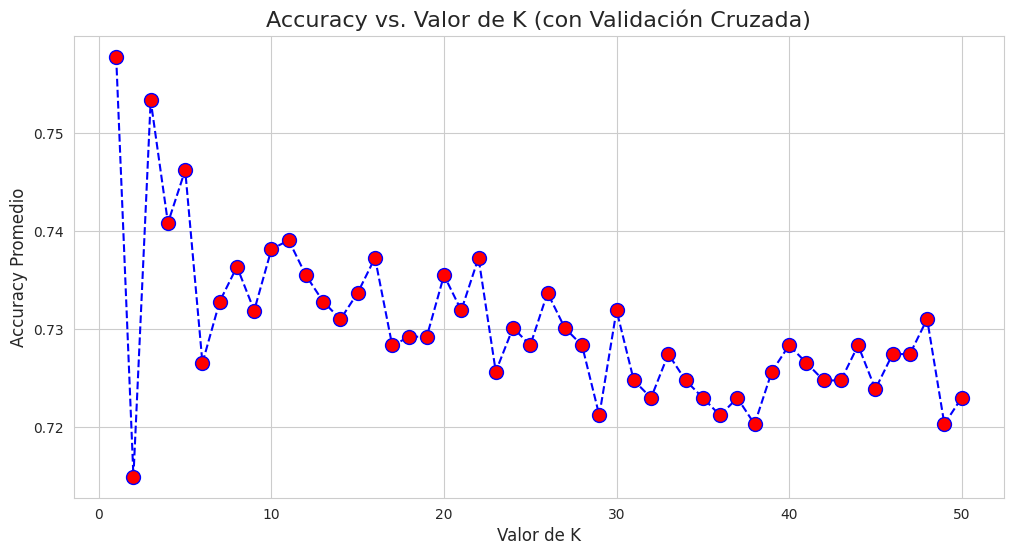

In [ ]:
#determino la cantidad de vecinos optima
from sklearn.model_selection import cross_val_score
# Rango de valores de k a probar (de 1 a 50)
k_range = range(1, 51)
k_scores = []

# Probar cada valor de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Validación cruzada (5-fold) y cálculo del accuracy promedio
    score = cross_val_score(knn, X_train_processed , y_train, cv=5, scoring='accuracy').mean()
    k_scores.append(score)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. Valor de K (con Validación Cruzada)', fontsize=16)
plt.xlabel('Valor de K', fontsize=12)
plt.ylabel('Accuracy Promedio', fontsize=12)
plt.grid(True)

plt.show()

Un k entre 13 o 15  muestra los mejores resultados


--- K-Nearest Neighbors (KNN) ---
Accuracy en el conjunto de validación: 0.7396
ROC AUC Score en el conjunto de validación: 0.8083

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       223
           1       0.75      0.77      0.76       257

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480


Confusion Matrix:
 [[158  65]
 [ 60 197]]
Clases en el modelo: [0 1]
Mapping: {0: np.int64(0), 1: np.int64(1)}


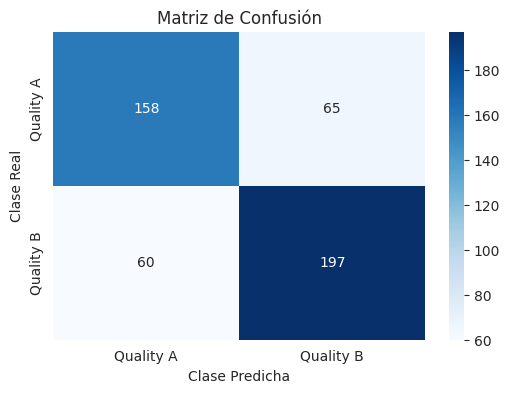

In [ ]:
# Modelo KNN
# Eejecuto el modelo con k = 15
model_knn = KNeighborsClassifier(n_neighbors=15)

# Entrenar el modelo
model_knn.fit(X_train_processed, y_train)

# Realizar predicciones
y_pred_model_knn = model_knn.predict(X_test_processed)
y_pred_proba_model_knn = model_knn.predict_proba(X_test_processed)[:, 1] # Probabilidades para la clase positiva (1)

# Evaluar el modelo
print("\n--- K-Nearest Neighbors (KNN) ---")
print(f"Accuracy en el conjunto de validación: {accuracy_score(y_test, y_pred_model_knn):.4f}")
print(f"ROC AUC Score en el conjunto de validación: {roc_auc_score(y_test, y_pred_proba_model_knn):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_model_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_model_knn))

#Visualizacion de matriz de confusion
print("Clases en el modelo:", model_knn.classes_)
print("Mapping:", dict(enumerate(model_knn.classes_)))
cm = confusion_matrix(y_test, y_pred_model_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Quality A', 'Quality B'],
            yticklabels=['Quality A', 'Quality B'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

#Metricas en variables
accuracy_knn = round(accuracy_score(y_test, y_pred_model_knn), 4)
auc_knn =  round(roc_auc_score(y_test, y_pred_proba_model_knn),4)
precision_knn = round(precision_score(y_test, y_pred_model_knn), 2)
recall_knn = round(recall_score(y_test, y_pred_model_knn), 2)
f1score_knn = round(f1_score(y_test, y_pred_model_knn), 2)

# Modelo SVM


--- Support Vector Machine (SVM)) ---
Accuracy en el conjunto de validación: 0.7354
ROC AUC Score en el conjunto de validación: 0.8324

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       223
           1       0.76      0.74      0.75       257

    accuracy                           0.74       480
   macro avg       0.73      0.74      0.73       480
weighted avg       0.74      0.74      0.74       480


Confusion Matrix:
 [[164  59]
 [ 68 189]]
Clases en el modelo: [0 1]
Mapping: {0: np.int64(0), 1: np.int64(1)}


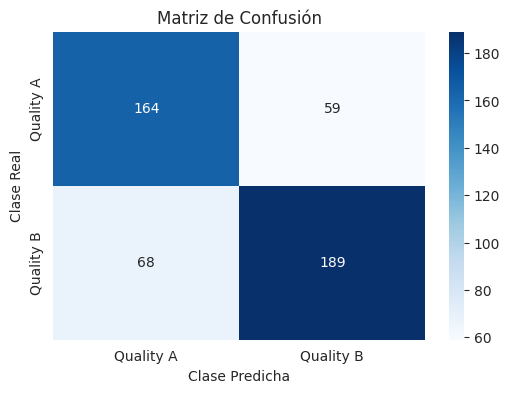

In [ ]:
#Genero el modelo SVM
model_SVM = SVC(kernel="rbf", C=1.0, gamma="scale",
                random_state=42, probability=True)  #SVC no tiene predict_proba() hay que habilitarlo con probability=True
model_SVM.fit(X_train_processed, y_train)

# Realizar predicciones
y_pred_model_SVM = model_SVM.predict(X_test_processed)
y_pred_proba_model_SVM = model_SVM.predict_proba(X_test_processed)[:, 1] # Probabilidades para la clase positiva (1)

# Evaluar el modelo
print("\n--- Support Vector Machine (SVM)) ---")
print(f"Accuracy en el conjunto de validación: {accuracy_score(y_test, y_pred_model_SVM):.4f}")
print(f"ROC AUC Score en el conjunto de validación: {roc_auc_score(y_test, y_pred_proba_model_SVM):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_model_SVM))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_model_SVM))

#Visualizacion de matriz de confusion
print("Clases en el modelo:", model_SVM.classes_)
print("Mapping:", dict(enumerate(model_SVM.classes_)))
cm = confusion_matrix(y_test, y_pred_model_SVM)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Quality A', 'Quality B'],
            yticklabels=['Quality A', 'Quality B'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#Pruebo optimizar con GrindSearch
param_grid= {'C':[0.1, 1,10,100,1000],  #Parámetro de regularización
              'gamma': ['scale', "auto",  0.001, 0.01, 0.1, 1], # Influencia de cada punto
              'kernel': ['rbf','linear'] # Tipo de kernel
              }
grid_search = GridSearchCV(estimator=SVC(random_state=42),param_grid= param_grid, refit = True, verbose=2, cv=5, scoring='accuracy')
print("Parametros a optimizar cargados")

Parametros a optimizar cargados


In [ ]:
#Ejecuto el gridSearch para buscar los mejores parametros
grid_search.fit(X_train_processed,y_train)
# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=aut

In [ ]:
#Pruebo optimizar mas cerca de los puntos  GrindSearch
param_grid= {'C':[8,9,10,11,12,13,14,15],  #Parámetro de regularización
              'gamma': ['scale', 0.1], # Influencia de cada punto
              'kernel': ['rbf'] # Tipo de kernel
              }
grid_search = GridSearchCV(estimator=SVC(random_state=42),param_grid= param_grid, refit = True, verbose=2, cv=5, scoring='accuracy')
print("Parametros a optimizar cargados")
#Ejecuto el gridSearch para buscar los mejores parametros
grid_search.fit(X_train_processed,y_train)
# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación:", grid_search.best_score_)

Parametros a optimizar cargados
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=8, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=8, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=8, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .......................C=8, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=8, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .........................C=8, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=8, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=8, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=8, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=8, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=9, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......


--- Support Vector Machine (SVM)) ---
Accuracy en el conjunto de validación: 0.7667
ROC AUC Score en el conjunto de validación: 0.8288

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       223
           1       0.79      0.77      0.78       257

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480


Confusion Matrix:
 [[170  53]
 [ 59 198]]
Clases en el modelo: [0 1]
Mapping: {0: np.int64(0), 1: np.int64(1)}


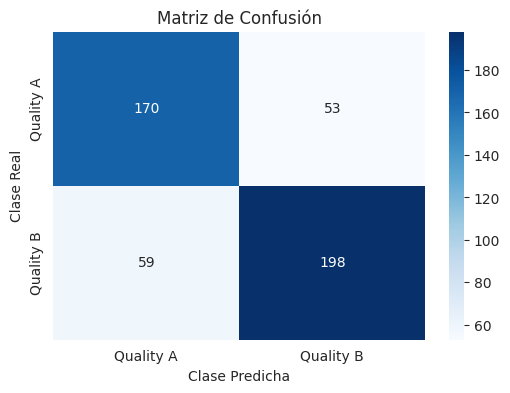

In [ ]:
#Genero el modelo SVM Con los parametro optimizados (podria haber generado una funcion antes para evitar repetir codigo)
model_SVM = SVC(kernel="rbf", C=10, gamma= 0.1,
                random_state=42, probability=True)  #SVC no tiene predict_proba() hay que habilitarlo con probability=True
model_SVM.fit(X_train_processed, y_train)

# Realizar predicciones
y_pred_model_SVM = model_SVM.predict(X_test_processed)
y_pred_proba_model_SVM = model_SVM.predict_proba(X_test_processed)[:, 1] # Probabilidades para la clase positiva (1)

# Evaluar el modelo
print("\n--- Support Vector Machine (SVM)) ---")
print(f"Accuracy en el conjunto de validación: {accuracy_score(y_test, y_pred_model_SVM):.4f}")
print(f"ROC AUC Score en el conjunto de validación: {roc_auc_score(y_test, y_pred_proba_model_SVM):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_model_SVM))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_model_SVM))

#Visualizacion de matriz de confusion
print("Clases en el modelo:", model_SVM.classes_)
print("Mapping:", dict(enumerate(model_SVM.classes_)))
cm = confusion_matrix(y_test, y_pred_model_SVM)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Quality A', 'Quality B'],
            yticklabels=['Quality A', 'Quality B'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

#Metricas en variables
accuracy_svm = round(accuracy_score(y_test, y_pred_model_SVM), 4)
auc_svm =  round(roc_auc_score(y_test, y_pred_proba_model_SVM),4)
precision_svm = round(precision_score(y_test, y_pred_model_SVM), 2)
recall_svm = round(recall_score(y_test, y_pred_model_SVM), 2)
f1score_svm = round(f1_score(y_test, y_pred_model_SVM), 2)

En teoria con parametros optimizados da un poco menos que en el 1er modelo (.85), igualmente tiene un ROC AUC de .84

# Modelo Random Forest y Bagging

In [ ]:
#Etiqueto el df en funcion de x e y
X = df_train_clean.drop("quality_stdr", axis=1)
y = df_train_clean["quality_stdr"]

#Divido el df para el entrenamiento 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#Para Random Forest no es necesatio el escalado de las variables numericas, pero si el tratamiento de outliners


--- Bagging ---
Accuracy en el conjunto de validación: 0.7812
ROC AUC Score en el conjunto de validación: 0.8688

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       223
           1       0.79      0.80      0.80       257

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480


Confusion Matrix:
 [[170  53]
 [ 52 205]]
Clases en el modelo: [0 1]
Mapping: {0: np.int64(0), 1: np.int64(1)}


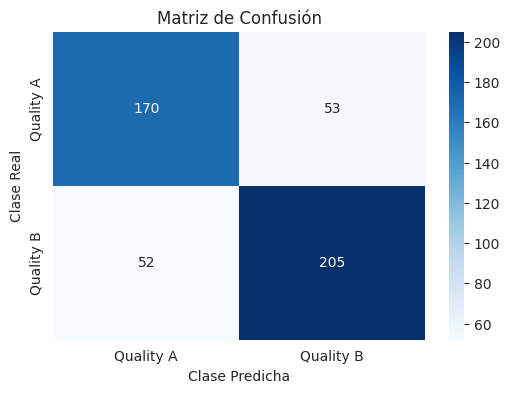

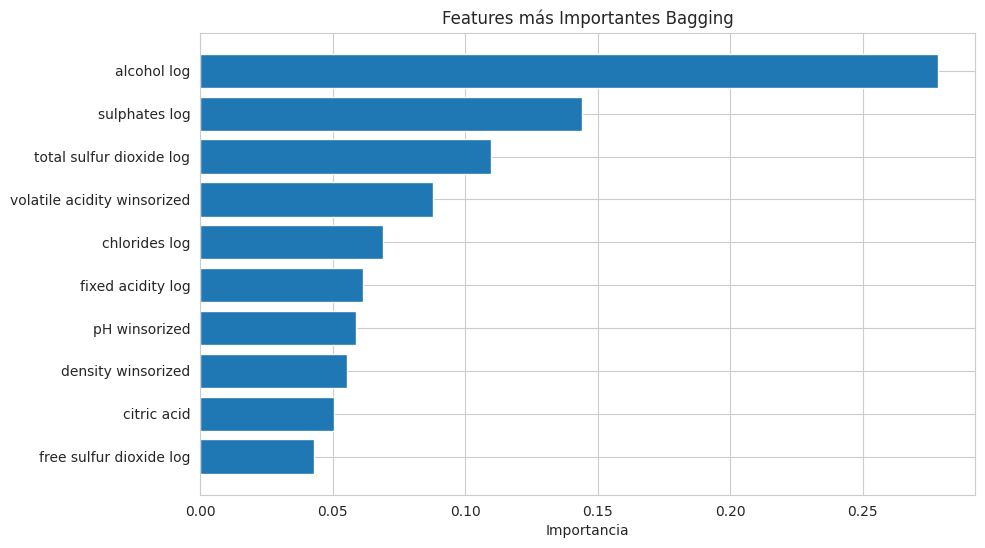

In [ ]:
#Genero el modelo de Bagging y evaluo las metricas
bg_classifier = RandomForestClassifier(
    n_estimators=200,      # Número de árboles
    max_features=1.0,      # Uso todas las features
    max_depth=15,        # Profundidad máxima (None = hasta hojas puras)
    min_samples_split=5,   # Mínimo muestras para dividir nodo
    min_samples_leaf=2,    # Mínimo muestras en hoja
    class_weight='balanced',  # Balanceo de la muestra
    random_state=42        # Reproducibilidad
)
#Ejecuto el modelo
bg_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred_model_bg = bg_classifier.predict(X_test)
y_pred_proba_model_bg = bg_classifier.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

# Evaluar el modelo
print("\n--- Bagging ---")
print(f"Accuracy en el conjunto de validación: {accuracy_score(y_test, y_pred_model_bg):.4f}")
print(f"ROC AUC Score en el conjunto de validación: {roc_auc_score(y_test, y_pred_proba_model_bg):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_model_bg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_model_bg))

#Visualizacion de matriz de confusion
print("Clases en el modelo:", bg_classifier.classes_)
print("Mapping:", dict(enumerate(bg_classifier.classes_)))
cm = confusion_matrix(y_test, y_pred_model_bg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Quality A', 'Quality B'],
            yticklabels=['Quality A', 'Quality B'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

# Importancia de features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': bg_classifier.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Importancia')
plt.title('Features más Importantes Bagging')
plt.gca().invert_yaxis()
plt.show()

#Metricas en variables
accuracy_bg = round(accuracy_score(y_test, y_pred_model_bg), 4)
auc_bg =  round(roc_auc_score(y_test, y_pred_proba_model_bg),4)
precision_bg = round(precision_score(y_test, y_pred_model_bg), 2)
recall_bg = round(recall_score(y_test, y_pred_model_bg), 2)
f1score_bg = round(f1_score(y_test, y_pred_model_bg), 2)


In [ ]:
# Optimizo parametros con GrindSearch
param_grid_bagging = {
    'n_estimators': [100, 200, 300],      # Más árboles = mejor performance, pero más lento
    'max_depth': [None, 10, 15, 20, 30],      # Controla complejidad (None = sin límite)
    'min_samples_split': [2, 5, 10],      # Evita overfitting
    'min_samples_leaf': [1, 2, 4],        # Evita overfitting
    'max_features': ['auto', 'sqrt', 'log2']  # Número de features para split
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_bagging,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación:", grid_search.best_score_)


Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor score de validación: 0.8132246957078797


# La aplicacion del sqrt conduce a un modelo de random forest


--- Random Forest ---
Accuracy en el conjunto de validación: 0.7937
ROC AUC Score en el conjunto de validación: 0.8684

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       223
           1       0.81      0.80      0.81       257

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480


Confusion Matrix:
 [[175  48]
 [ 51 206]]
Clases en el modelo: [0 1]
Mapping: {0: np.int64(0), 1: np.int64(1)}


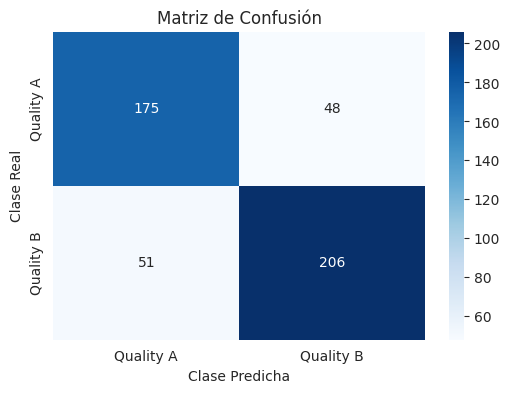

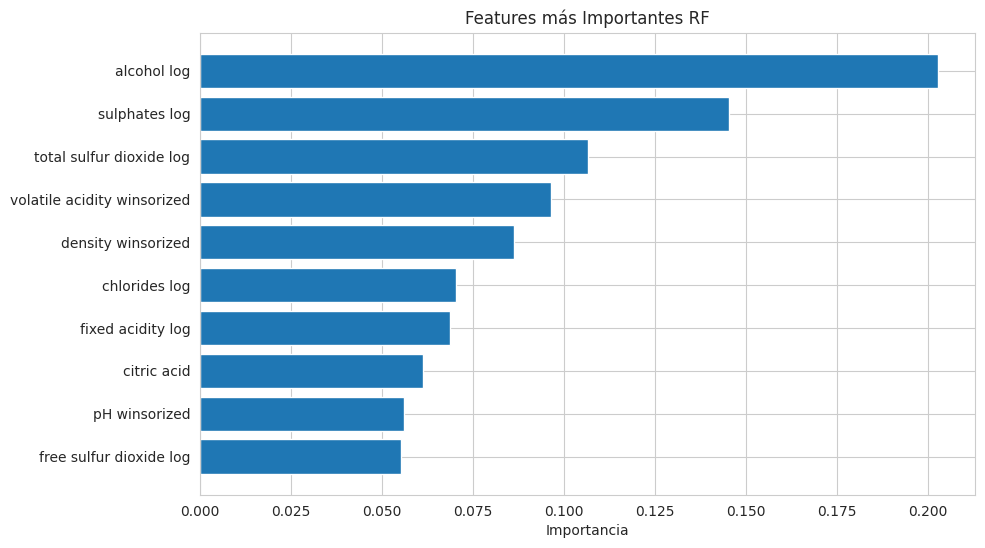

In [ ]:
#Genero el modelo de Random Forest con los hiperparametros especificados anterioremente y evaluo las metricas
rf_classifier = RandomForestClassifier(
    n_estimators=300,      # Número de árboles
    max_features="sqrt",      # se usan una cantidad de sqrt de n features
    max_depth=10,        # Profundidad máxima (None = hasta hojas puras)
    min_samples_split=2,   # Mínimo muestras para dividir nodo
    min_samples_leaf=1,    # Mínimo muestras en hoja
    class_weight='balanced',  # Balanceo de la muestra
    random_state=42        # Reproducibilidad
)
#Ejecuto el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred_model_rf = rf_classifier.predict(X_test)
y_pred_proba_model_rf = rf_classifier.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

# Evaluar el modelo
print("\n--- Random Forest ---")
print(f"Accuracy en el conjunto de validación: {accuracy_score(y_test, y_pred_model_rf):.4f}")
print(f"ROC AUC Score en el conjunto de validación: {roc_auc_score(y_test, y_pred_proba_model_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_model_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_model_rf))

#Visualizacion de matriz de confusion
print("Clases en el modelo:", rf_classifier.classes_)
print("Mapping:", dict(enumerate(rf_classifier.classes_)))
cm = confusion_matrix(y_test, y_pred_model_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Quality A', 'Quality B'],
            yticklabels=['Quality A', 'Quality B'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

# Importancia de features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)
# Importancia de features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Importancia')
plt.title('Features más Importantes RF')
plt.gca().invert_yaxis()
plt.show()

#Metricas en variables
accuracy_rf = round(accuracy_score(y_test, y_pred_model_rf), 4)
auc_rf =  round(roc_auc_score(y_test, y_pred_proba_model_rf),4)
precision_rf = round(precision_score(y_test, y_pred_model_rf), 2)
recall_rf = round(recall_score(y_test, y_pred_model_rf), 2)
f1score_rf = round(f1_score(y_test, y_pred_model_rf), 2)



Mejoraron los resultados de RF respcto al de bagging

# Modelo XGBoost

In [ ]:
#Etiqueto el df en funcion de x e y
X = df_train_clean.drop("quality_stdr", axis=1)
y = df_train_clean["quality_stdr"]



#Divido el df para el entrenamiento 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#Para XGBoost no es necesatio el escalado de las variables numericas, pero si el tratamiede outliners, pero si necesito codificar la variable target




--- Random Forest ---
Accuracy en el conjunto de validación: 0.8187
ROC AUC Score en el conjunto de validación: 0.8782

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       223
           1       0.84      0.82      0.83       257

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480


Confusion Matrix:
 [[183  40]
 [ 47 210]]
Clases en el modelo: [0 1]
Mapping: {0: np.int64(0), 1: np.int64(1)}


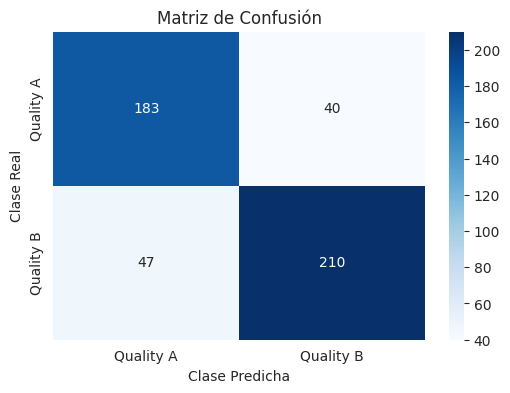

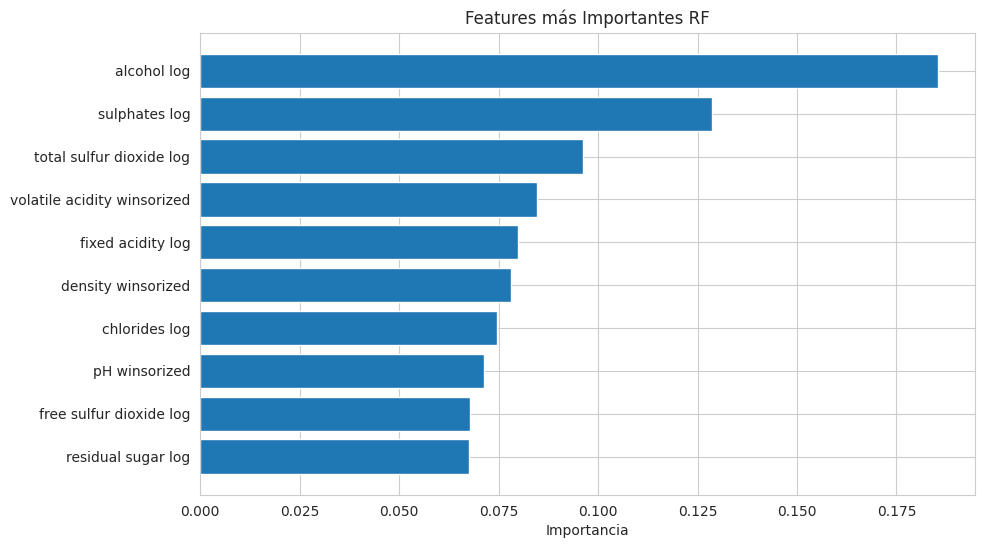

In [ ]:
#Genero el modelo y lo evaluo en funcion de los parametros
model_xgb =XGBClassifier(
            objective='binary:logistic',
    n_estimators=1000,           # Más árboles con learning rate bajo
    learning_rate=0.05,          # Learning rate bajo
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    #early_stopping_rounds=50,    # Parada temprana
    eval_metric='logloss'        # Métrica de evaluación
)
#Ejecuto el modelo
model_xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_model_xgb = model_xgb.predict(X_test)
y_pred_proba_model_xgb = model_xgb.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

# Evaluar el modelo
print("\n--- Random Forest ---")
print(f"Accuracy en el conjunto de validación: {accuracy_score(y_test, y_pred_model_xgb):.4f}")
print(f"ROC AUC Score en el conjunto de validación: {roc_auc_score(y_test, y_pred_proba_model_xgb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_model_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_model_xgb))

#Visualizacion de matriz de confusion
print("Clases en el modelo:", model_xgb.classes_)
print("Mapping:", dict(enumerate(model_xgb.classes_)))
cm = confusion_matrix(y_test, y_pred_model_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Quality A', 'Quality B'],
            yticklabels=['Quality A', 'Quality B'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

# Importancia de features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model_xgb.feature_importances_
}).sort_values('importance', ascending=False)
# Importancia de features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Importancia')
plt.title('Features más Importantes RF')
plt.gca().invert_yaxis()
plt.show()

#Metricas en variables
accuracy_xgb = round(accuracy_score(y_test, y_pred_model_xgb), 4)
auc_xgb =  round(roc_auc_score(y_test, y_pred_proba_model_xgb),4)
precision_xgb = round(precision_score(y_test, y_pred_model_xgb), 2)
recall_xgb = round(recall_score(y_test, y_pred_model_xgb), 2)
f1score_xgb = round(f1_score(y_test, y_pred_model_xgb), 2)


In [ ]:
#Parametro para optimizar el modelo
param_grid = {
    # Hiperparámetros principales
    'n_estimators': [100, 200, 300],          # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1],       # Tasa de aprendizaje
    'max_depth': [3, 4, 5, 6],                # Profundidad máxima

    # Regularización
    'reg_alpha': [0, 0.1, 0.5],               # Regularización L1
    'reg_lambda': [0.5, 1, 1.5],              # Regularización L2
    'gamma': [0, 0.1, 0.2],                   # Reducción mínima de pérdida

    # Submuestreo
    'subsample': [0.8, 0.9, 1.0],             # Submuestra de instancias
    'colsample_bytree': [0.8, 0.9, 1.0],      # Submuestra de features por árbol

    # Para overfitting
    'min_child_weight': [1, 3, 5]             # Peso mínimo en hojas
}

# Modelo base para GridSearch
xgb_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

# Parametros
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',           # Métrica a optimizar
    cv=5,                         # 5-fold cross-validation
    n_jobs=-1,                    # Usar todos los núcleos
    verbose=2,                    # Mostrar progreso detallado
    refit=True,                   # Re-entrenar con mejores parámetros
    return_train_score=True       # Para análisis de overfitting
)

print("Iniciando GridSearch...")
grid_search.fit(X_train, y_train)

print("¡Búsqueda completada!")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score de validación: {grid_search.best_score_:.4f}")

Iniciando GridSearch...
Fitting 5 folds for each of 26244 candidates, totalling 131220 fits


KeyboardInterrupt: 

No se optimizo por tiempo de ejecucion

# Modelo DNN

Importo tensorflow y keras

In [ ]:
import tensorflow
tensorflow.__version__
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import AUC

In [ ]:
#transformaciones necesarias
#Etiqueto el df en funcion de x e y
X = df_train_clean.drop("quality_stdr", axis=1).values
y = df_train_clean["quality_stdr"].values

print(X.shape)
print(y.shape)
#Divido el df para el entrenamiento 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Se escala los valores numericos mediante StandarScale (se puede usar RoboustScaler si hay muchos atipicos)

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train) # Ajustar y transformar training data
X_test_processed = scaler.transform(X_test) # Transformar test data (SOLO transform, NO fit_transform)

(1599, 11)
(1599,)


Se opta por implementar el modelo utilizando la API funcional, lo que permite una mayor flexibilidad en la arquitectura y facilita futuras extensiones. La red estará compuesta por:
Entrada: una capa Input que recibe las 11 variables predictoras preprocesadas.
Capas ocultas: tres capas densas con activación ReLU:
Primera capa: 32 neuronas
Segunda capa: 16 neuronas
Tercera capa: 8 neuronas
Capa de salida: una única neurona con activación sigmoidea.
Configuración del entrenamiento
No se aplicará Dropout en esta etapa.
Optimizador: se utilizará Adam, con una tasa de aprendizaje de 0.001.
Función de pérdida: binary_crossentropy.

In [ ]:
#Número de features
n_features = X_train_processed.shape[1]

#Definir la capa de entrada
inputs= keras.Input(shape=(n_features,), name= "entrada")
#1ra capa oculta
x= Dense(32, activation='relu', name='capa1')(inputs)
#2da capa oculta
x= Dense(16, activation='relu', name='capa2')(x)
#3ra capa oculta
x=Dense(8, activation='relu', name='capa3')(x)
#Capa de salida
outputs = Dense(1, activation='sigmoid', name='salida')(x)
#Creo el modelo
model_1 = keras.Model(inputs=inputs, outputs=outputs, name='model_1')

# Compilar el modelo
model_1.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate por defecto
    loss='binary_crossentropy',           # Función de pérdida para binaria
    metrics=['accuracy', AUC(name='roc_auc')]  # Métricas a monitorizar
)

model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa1 (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa2 (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa3 (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

**Fit del modelo**:
Para mejorar la velocidad en que se entrena el modelo, se utiliza callbacks

In [ ]:
model_1.fit(
    X_train_processed,y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10),  # Detener si no mejora
        ModelCheckpoint(monitor='val_loss', filepath='best_model_1.keras', save_best_only=True)
]
)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5774 - loss: 0.6828 - roc_auc: 0.5866 - val_accuracy: 0.6875 - val_loss: 0.6463 - val_roc_auc: 0.7189
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6781 - loss: 0.6354 - roc_auc: 0.7386 - val_accuracy: 0.7312 - val_loss: 0.5946 - val_roc_auc: 0.7808
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7297 - loss: 0.5834 - roc_auc: 0.7910 - val_accuracy: 0.7500 - val_loss: 0.5594 - val_roc_auc: 0.7944
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7453 - loss: 0.5469 - roc_auc: 0.8098 - val_accuracy: 0.7521 - val_loss: 0.5391 - val_roc_auc: 0.8051
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7597 - loss: 0.5064 - roc_auc: 0.8375 - val_accuracy: 0.7521 - val_loss: 0.5316 - val_roc_auc: 0.8112
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7353 - loss: 0.5223 - roc_auc: 0.8199 - val_accuracy: 0.7437 - val_loss: 0.5264 - val_roc_auc: 0.

**Evaluacion del modelo**

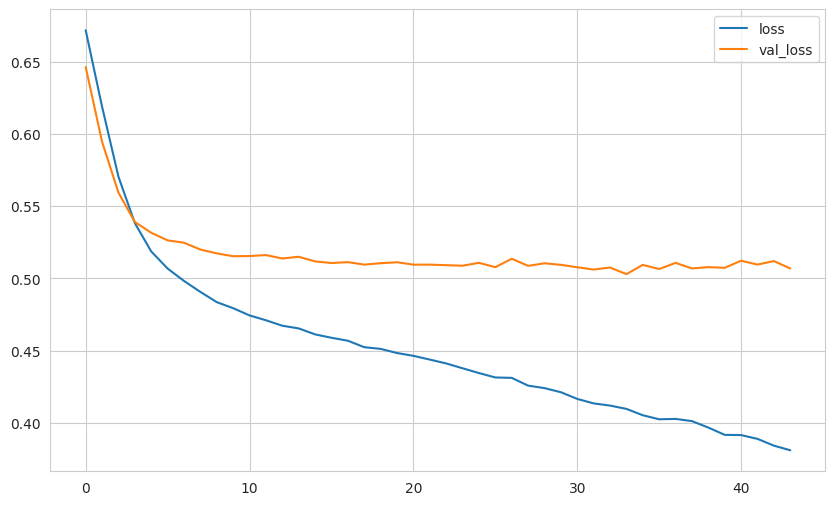

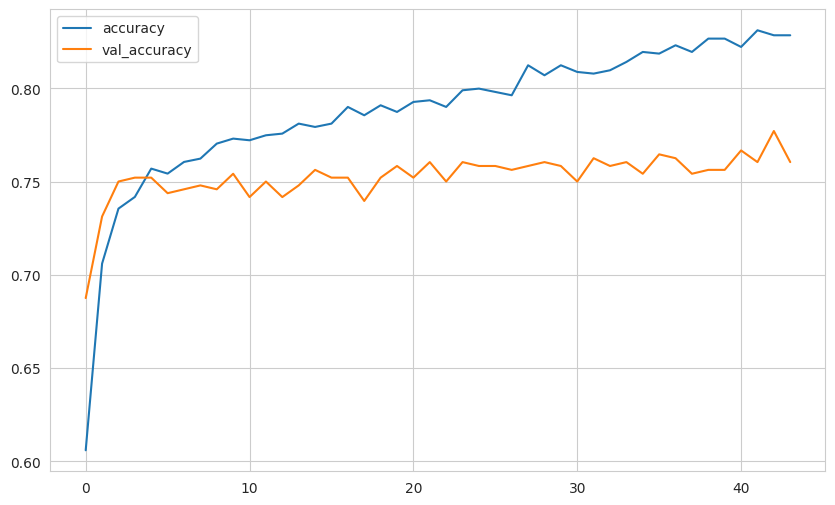

In [ ]:
loss_df = pd.DataFrame(model_1.history.history)
loss_df.tail()
loss_df = pd.DataFrame(model_1.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()
loss_df[['accuracy', 'val_accuracy']].plot(legend=True)
plt.show()

El entrenamiento del modelo se configuró para un máximo de 100 épocas, pero gracias al uso del callback EarlyStopping, el proceso se detuvo anticipadamente en la época 35. Esto ocurrió porque la métrica de validación val_loss dejó de mejorar durante 10 épocas consecutivas, lo que indica que el modelo había alcanzado su punto óptimo de aprendizaje antes del límite establecido.
La evolución de las métricas se visualizó mediante dos gráficos:
Curva de pérdida - loss vs val_loss: muestra una disminución progresiva en ambas métricas durante las primeras épocas. Sin embargo, hacia el final, la val_loss comienza a aumentar levemente, lo que sugiere el inicio de sobreajuste.
Curva de precisión - accuracy vs val_accuracy: sigue una tendencia similar, con mejoras sostenidas en la precisión de entrenamiento, pero una estabilización en la precisión de validación, lo que refuerza la decisión de detener el entrenamiento.

In [ ]:
test_loss, test_accuracy, test_roc_auc = model_1.evaluate(
    X_test_processed, y_test, verbose=0
)
#Calculo F1 score
y_pred_proba = model_1.predict(X_test_processed, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convertir probabilidades a clases
test_f1 = f1_score(y_test, y_pred)

print(f"\nResultados en Test:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")


#Metricas en variables
accuracy_dnn_1= round(test_accuracy,4)
auc_dnn_1 =  round(test_roc_auc,4)
f1score_dnn_1 = round(test_f1, 2)



Resultados en Test:
Accuracy: 0.7604
ROC AUC: 0.8420
F1 Score: 0.7714


El modelo logró un buen desempeño, alcanzando una precisión de validación del 76.04%.Esta consistencia sugiere que el modelo generaliza bien y no está sobreajustado al conjunto de entrenamiento.

Modelo 2: para este modelo se propone regularizar mediante dropout de las 3 capas ocultas. Se dara dropout de 0.2, 0.3 y 0.3 a acada una de las capas ocultas

In [ ]:
#Número de features
n_features = X_train_processed.shape[1]

#Definir la capa de entrada
inputs= keras.Input(shape=(n_features,), name= "entrada")
#1ra capa oculta
x= Dense(32, activation='relu', name='capa1')(inputs)
x = Dropout(0.2, name='dropout_1')(x)
#2da capa oculta
x= Dense(16, activation='relu', name='capa2')(x)
x = Dropout(0.3, name='dropout_2')(x)
#3ra capa oculta
x=Dense(8, activation='relu', name='capa3')(x)
x = Dropout(0.3, name='dropout_3')(x)
#Capa de salida
outputs = Dense(1, activation='sigmoid', name='salida')(x)
#Creo el modelo
model_2 = keras.Model(inputs=inputs, outputs=outputs, name='model_2')

# Compilar el modelo
model_2.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate por defecto
    loss='binary_crossentropy',           # Función de pérdida para binaria
    metrics=['accuracy', AUC(name='roc_auc')]  # Métricas a monitorizar
)

model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa1 (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa2 (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa3 (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

**Fit del modelo**:

In [ ]:
model_2.fit(
    X_train_processed,y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10),  # Detener si no mejora
        ModelCheckpoint(monitor='val_loss', filepath='best_model_2.keras', save_best_only=True)
]
)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.5307 - loss: 0.7282 - roc_auc: 0.5218 - val_accuracy: 0.6667 - val_loss: 0.6424 - val_roc_auc: 0.7240
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6391 - loss: 0.6445 - roc_auc: 0.6918 - val_accuracy: 0.7104 - val_loss: 0.6166 - val_roc_auc: 0.7586
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6588 - loss: 0.6309 - roc_auc: 0.7088 - val_accuracy: 0.7063 - val_loss: 0.5969 - val_roc_auc: 0.7677
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6778 - loss: 0.6109 - roc_auc: 0.7425 - val_accuracy: 0.7104 - val_loss: 0.5833 - val_roc_auc: 0.7762
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6690 - loss: 0.6115 - roc_auc: 0.7227 - val_accuracy: 0.7146 - val_loss: 0.5710 - val_roc_auc: 0.7871
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6921 - loss: 0.5987 - roc_auc: 0.7438 - val_accuracy: 0.7229 - val_loss: 0.5591 - val_roc_auc

**Evaluacion del modelo**

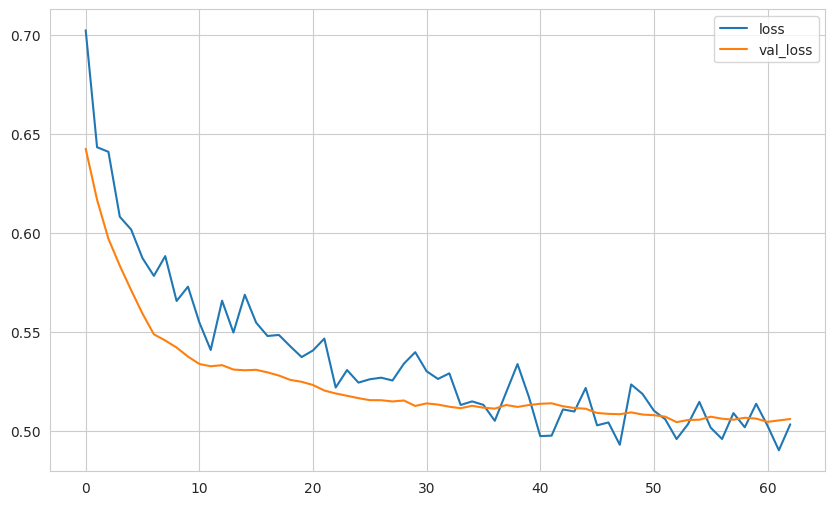

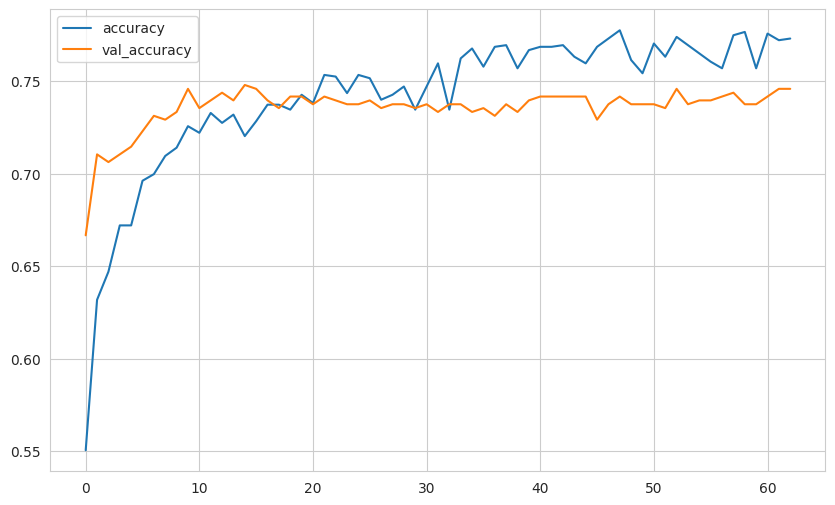

In [ ]:
loss_df = pd.DataFrame(model_2.history.history)
loss_df.tail()
loss_df = pd.DataFrame(model_2.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()
loss_df[['accuracy', 'val_accuracy']].plot(legend=True)
plt.show()

El modelo fue entrenado con un máximo de 100 épocas, pero gracias al uso del callback, el proceso se detuvo anticipadamente en la época 60 aprox. Esto indica que el modelo alcanzó su mejor desempeño antes de agotar el ciclo completo, evitando así el sobreajuste.
Análisis de las curvas de entrenamiento:
La curva de pérdida: muestra una tendencia estable, con una ligera oscilación en las últimas épocas, pero sin indicios fuertes de sobreajuste.
La curva de precisión: se mantiene cercana entre entrenamiento y validación, lo que sugiere que el modelo generaliza bien.
La regularización mediante Dropout (0.2, 0.3 y 0.3 en las capas ocultas) parece haber cumplido su función, controlando la complejidad del modelo y evitando que se ajuste demasiado a los datos de entrenamiento.

In [ ]:
test_loss, test_accuracy, test_roc_auc = model_2.evaluate(
    X_test_processed, y_test, verbose=0
)

test_f1_1 = f1_score(y_test, y_pred)

print(f"\nResultados en Test:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1_1:.4f}")

#Metricas en variables
accuracy_dnn_2= round(test_accuracy,4)
auc_dnn_2 =  round(test_roc_auc,4)
f1score_dnn_2 = round(test_f1_1, 2)


Resultados en Test:
Accuracy: 0.7458
ROC AUC: 0.8289
F1 Score: 0.7714


El modelo logró clasificar correctamente el 74.58% de los casos en datos no vistos, lo cual no representa una mejora marginal respecto al Modelo 1 (76.42%).
La precisión obtenida en test está alineada con la val_accuracy observada durante el entrenamiento 76.42%, lo que refuerza la idea de que el modelo no sufrió sobreajuste y que el conjunto de test fue representativo del comportamiento general del modelo.


Modelo 3: para este modelo se propone sumarle regularizacion L1+L2, apra ver si mejora

In [ ]:
#Número de features
n_features = X_train_processed.shape[1]

#Definir la capa de entrada
inputs= keras.Input(shape=(n_features,), name= "entrada")
#1ra capa oculta
x= Dense(32, activation='relu',  kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), name='capa1')(inputs)
x = Dropout(0.2, name='dropout_1')(x)
#2da capa oculta
x= Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), name='capa2')(x)
x = Dropout(0.3, name='dropout_2')(x)
#3ra capa oculta
x=Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), name='capa3')(x)
x = Dropout(0.3, name='dropout_3')(x)
#Capa de salida
outputs = Dense(1, activation='sigmoid', name='salida')(x)
#Creo el modelo
model_3 = keras.Model(inputs=inputs, outputs=outputs, name='model_3')

# Compilar el modelo
model_3.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate por defecto
    loss='binary_crossentropy',           # Función de pérdida para binaria
    metrics=['accuracy', AUC(name='roc_auc')]   # Métricas a monitorizar
)

model_3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa1 (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa2 (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa3 (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

**Evaluacion del modelo**

In [ ]:
model_3.fit(
    X_train_processed,y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10),  # Detener si no mejora
        ModelCheckpoint(monitor='val_loss', filepath='best_model_3.keras', save_best_only=True)
]
)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.5399 - loss: 0.7691 - roc_auc: 0.5350 - val_accuracy: 0.6146 - val_loss: 0.7185 - val_roc_auc: 0.7111
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5461 - loss: 0.7389 - roc_auc: 0.5650 - val_accuracy: 0.7312 - val_loss: 0.6974 - val_roc_auc: 0.7689
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6197 - loss: 0.7145 - roc_auc: 0.6657 - val_accuracy: 0.7375 - val_loss: 0.6771 - val_roc_auc: 0.7941
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6415 - loss: 0.6861 - roc_auc: 0.7075 - val_accuracy: 0.7312 - val_loss: 0.6572 - val_roc_auc: 0.8008
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6523 - loss: 0.6811 - roc_auc: 0.7027 - val_accuracy: 0.7312 - val_loss: 0.6422 - val_roc_auc: 0.8040
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6691 - loss: 0.6655 - roc_auc: 0.7467 - val_accuracy: 0.7312 - val_loss: 0.6259 - val_roc_auc

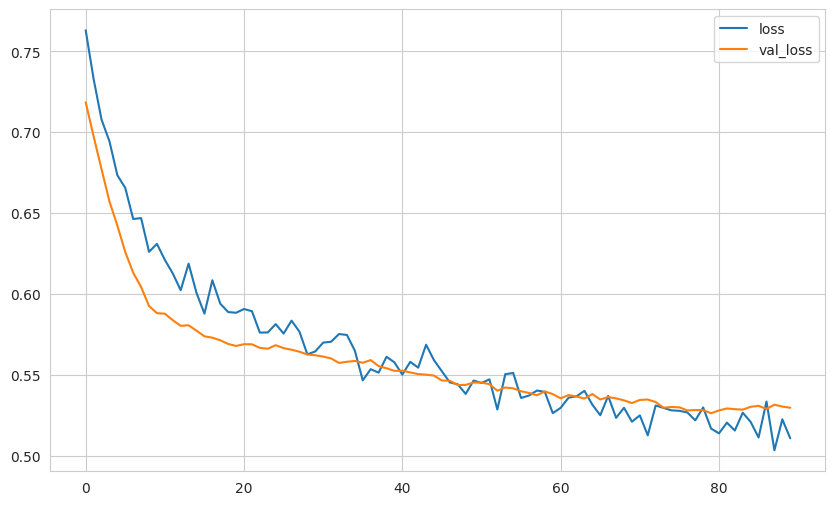

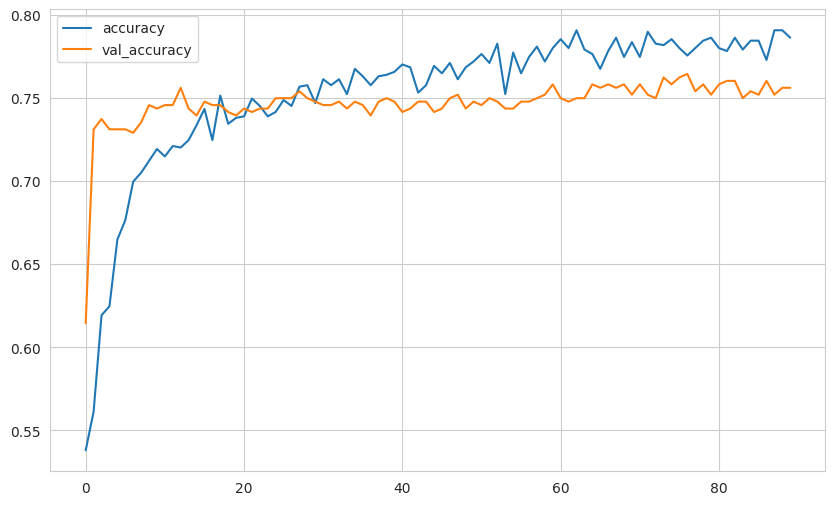

In [ ]:
loss_df = pd.DataFrame(model_3.history.history)
loss_df.tail()
loss_df = pd.DataFrame(model_3.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()
loss_df[['accuracy', 'val_accuracy']].plot(legend=True)
plt.show()

El entrenamiento se configuró para un máximo de 100 épocas, pero se detuvo anticipadamente en la época 90 gracias al callback, que monitoreó la métrica val_loss. Esto indica que el modelo alcanzó su mejor desempeño antes de agotar el ciclo completo, evitando sobreentrenamiento.
La curva de pérdida: muestra una tendencia estable, sin divergencias significativas entre entrenamiento y validación, lo que sugiere que el modelo se mantuvo bien regulado.
La curva de precisión: también se mantuvo alineada, con una diferencia mínima entre ambos conjuntos, lo que indica buena capacidad de generalización.

In [ ]:
test_loss, test_accuracy, test_roc_auc = model_3.evaluate(
    X_test_processed, y_test, verbose=0
)

test_f1_3 = f1_score(y_test, y_pred)

print(f"\nResultados en Test:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")

#Metricas en variables
accuracy_dnn_3= round(test_accuracy,4)
auc_dnn_3 =  round(test_roc_auc,4)
f1score_dnn_3 = round(test_f1_3, 2)



Resultados en Test:
Accuracy: 0.7563
ROC AUC: 0.8376
F1 Score: 0.7714


Este resultado indica que el modelo logró clasificar correctamente el 75% de los casos en datos no vistos. Aunque la precisión del Modelo 3 no supera a la del Modelo 2, su arquitectura más disciplinada puede ofrecer ventajas en términos de robustez, resistencia al ruido y control de complejidad.

Modelo 4: Para este modelo se propone incrementar la profundidad de la red neuronal pasando de tres a cinco capas ocultas, manteniendo las estrategias de regularización previamente utilizadas.

In [ ]:
#Número de features
n_features = X_train_processed.shape[1]

#Definir la capa de entrada
inputs= keras.Input(shape=(n_features,), name= "entrada")
#1ra capa oculta
x= Dense(128, activation='relu',  kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), name='capa1')(inputs)
x = Dropout(0.2, name='dropout_1')(x)
#2da capa oculta
x= Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), name='capa2')(x)
x = Dropout(0.3, name='dropout_2')(x)
#3ra capa oculta
x=Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), name='capa3')(x)
x = Dropout(0.3, name='dropout_3')(x)
#4ra capa oculta
x=Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), name='capa4')(x)
x = Dropout(0.3, name='dropout_4')(x)
#5ra capa oculta
x=Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), name='capa5')(x)
x = Dropout(0.3, name='dropout_5')(x)
#Capa de salida
outputs = Dense(1, activation='sigmoid', name='salida')(x)
#Creo el modelo
model_4 = keras.Model(inputs=inputs, outputs=outputs, name='model_4')

# Compilar el modelo
model_4.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate por defecto
    loss='binary_crossentropy',           # Función de pérdida para binaria
    metrics=['accuracy', AUC(name='roc_auc')]   # Métricas a monitorizar
)

model_4.summary()

Model: "model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa1 (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa2 (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa3 (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa4 (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa5 (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4.fit(
    X_train_processed,y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10),  # Detener si no mejora
        ModelCheckpoint(monitor='val_loss', filepath='best_model_4.keras', save_best_only=True)
]
)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - accuracy: 0.4804 - loss: 1.0011 - roc_auc: 0.4801 - val_accuracy: 0.6792 - val_loss: 0.9641 - val_roc_auc: 0.7274
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5520 - loss: 0.9624 - roc_auc: 0.5668 - val_accuracy: 0.7083 - val_loss: 0.9169 - val_roc_auc: 0.7780
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6271 - loss: 0.9126 - roc_auc: 0.6853 - val_accuracy: 0.7375 - val_loss: 0.8399 - val_roc_auc: 0.8075
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5888 - loss: 0.8833 - roc_auc: 0.6548 - val_accuracy: 0.7417 - val_loss: 0.7965 - val_roc_auc: 0.8168
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6847 - loss: 0.8235 - roc_auc: 0.7674 - val_accuracy: 0.7417 - val_loss: 0.7585 - val_roc_auc: 0.8199
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6529 - loss: 0.8235 - roc_auc: 0.7332 - val_accuracy: 0.7437 - val_loss: 0.7449 - val_roc_au

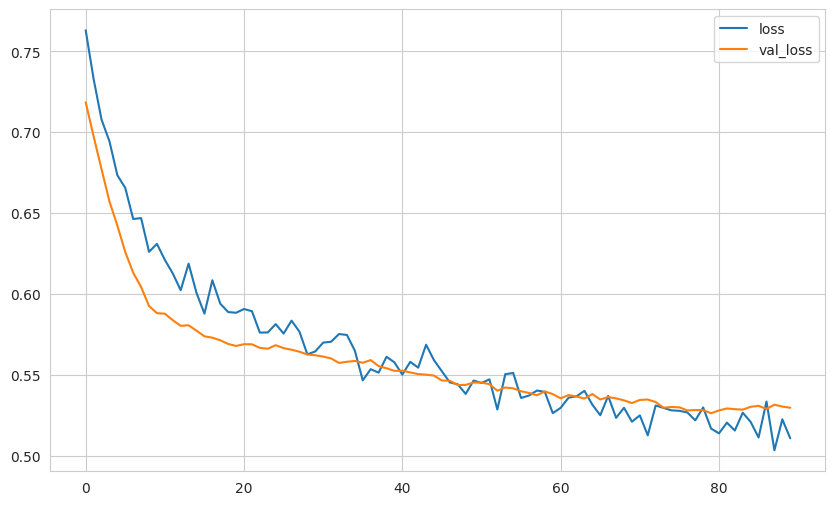

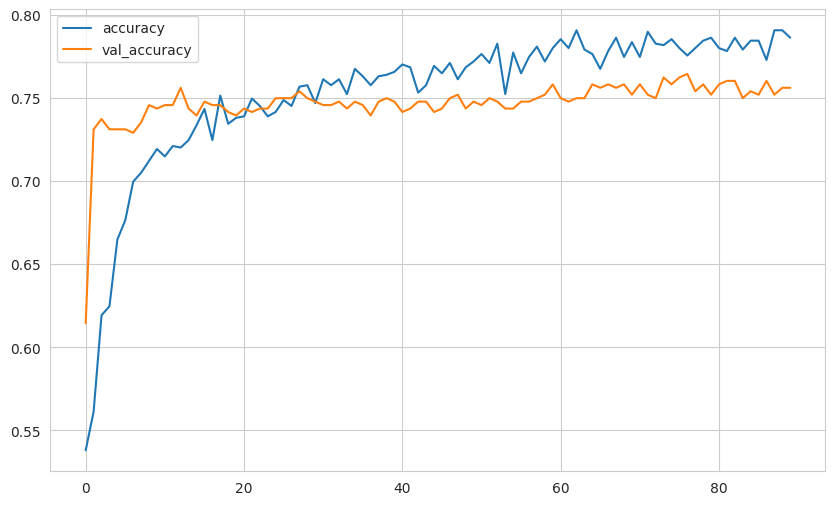

In [ ]:
loss_df = pd.DataFrame(model_3.history.history)
loss_df.tail()
loss_df = pd.DataFrame(model_3.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()
loss_df[['accuracy', 'val_accuracy']].plot(legend=True)
plt.show()

El entrenamiento se detuvo automáticamente en la época 67 gracias al callback, lo que indica que el modelo alcanzó su punto óptimo antes de agotar las 100 épocas previstas. Este comportamiento confirma que las técnicas de regularización fueron efectivas y que el modelo no sobreajustó.
Curva de pérdida: una tendencia descendente en las primeras épocas, seguida de una estabilización. No se observan divergencias significativas, lo que indica que el modelo se mantuvo regulado y no sobreajustó.
Curva de precisión: ambas métricas evolucionan de forma paralela, con una mejora sostenida y sin fluctuaciones abruptas, lo que sugiere buena capacidad de generalización.

In [ ]:
test_loss, test_accuracy, test_roc_auc = model_4.evaluate(
    X_test_processed, y_test, verbose=0
)
test_f1_4 = f1_score(y_test, y_pred)

print(f"\nResultados en Test:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1_4:.4f}")


#Metricas en variables
accuracy_dnn_4= round(test_accuracy,4)
auc_dnn_4 =  round(test_roc_auc,4)
f1score_dnn_4 = round(test_f1_3, 2)


Resultados en Test:
Accuracy: 0.7729
ROC AUC: 0.8418
F1 Score: 0.7714


l Modelo 4, con cinco capas ocultas y regularización combinada (L1+L2 y Dropout), demostró ser el más eficaz dentro del conjunto de redes neuronales evaluadas, alcanzando una precisión en test de 77.29%. Esta arquitectura logró un equilibrio entre profundidad, capacidad de aprendizaje y control de sobreajuste, evidenciado por la detención anticipada en la época 67 mediante EarlyStopping, lo que indica una convergencia eficiente sin pérdida de generalización.
Comparativamente, los modelos con regularización mostraron mejoras leves respecto al Modelo 1 (sin regularización), confirmando que tanto Dropout como penalización de pesos contribuyen a estabilizar el entrenamiento. Además, el aumento en el número de capas ocultas tuvo un impacto positivo en la métrica de exactitud, permitiendo al modelo capturar patrones más complejos del dataset.
Sin embargo, al contrastar estos resultados con los modelos clásicos evaluados en el TP2 de Machine Learning (RL, KNN, SVM, Bagging, RF, XGBoost), se observa que la métrica de exactitud varió entre 0.74 y 0.81, siendo XGBoost el modelo con mejor desempeño. Esto sugiere que, para este conjunto de datos, no es necesario recurrir a arquitecturas profundas como DNN para alcanzar altos niveles de precisión, ya que modelos de ensamble como XGBoost ofrecen mejor rendimiento con menor costo computacional.
En resumen, aunque las redes neuronales profundas pueden ser útiles y escalables, su aplicación debe justificarse por la complejidad del problema y la disponibilidad de recursos. Para este caso, XGBoost se presenta como la opción más eficiente y efectiva, mientras que el Modelo 4 destaca como el mejor entre las DNN analizadas.

# Visualizacion de todas las metricas

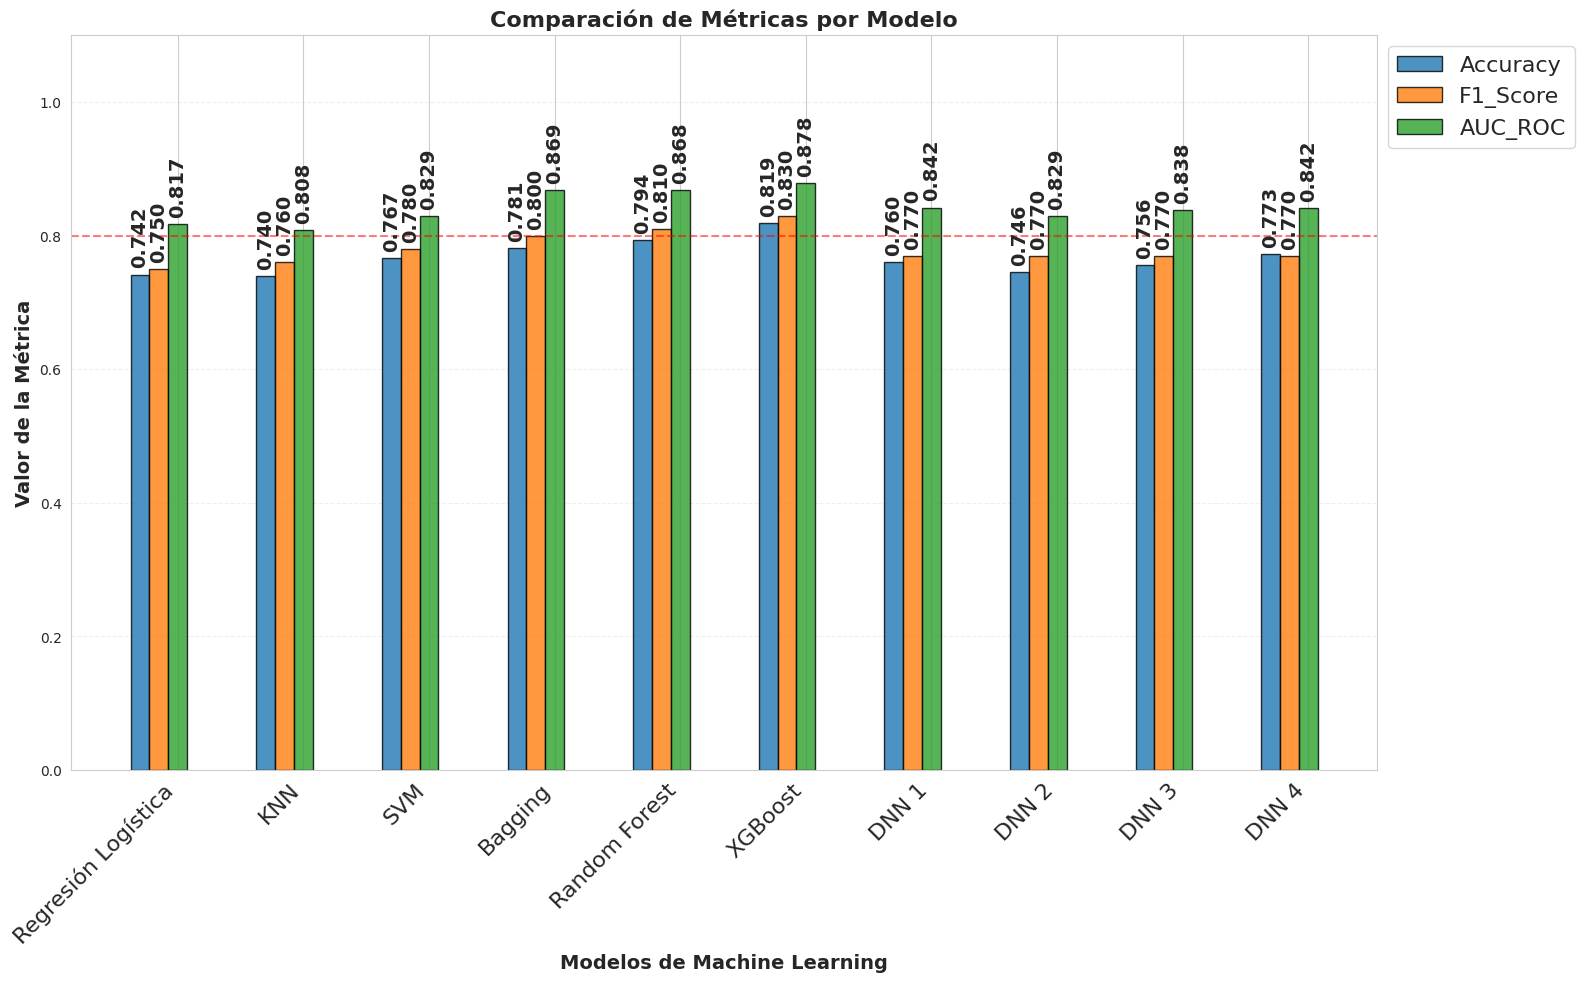

In [ ]:
#Grafica resumen de las metricas de los resultados
resultados_reales = {
    'Modelo': ['Regresión Logística', 'KNN', 'SVM',
               'Bagging', 'Random Forest', 'XGBoost', "DNN 1",
               "DNN 2", "DNN 3", "DNN 4"],

    'Accuracy': [
        accuracy_rl, accuracy_knn, accuracy_svm,
        accuracy_bg, accuracy_rf, accuracy_xgb, accuracy_dnn_1,
        accuracy_dnn_2, accuracy_dnn_3, accuracy_dnn_4
    ],

    'F1_Score': [
         f1score_rl, f1score_knn, f1score_svm,
        f1score_bg, f1score_rf, f1score_xgb,
        f1score_dnn_1, f1score_dnn_2, f1score_dnn_3,
        f1score_dnn_4
    ],

    'AUC_ROC': [
       auc_rl, auc_knn, auc_svm,
        auc_bg, auc_rf, auc_xgb, auc_dnn_1,
        auc_dnn_2, auc_dnn_3, auc_dnn_4
    ]


}

df_resultados = pd.DataFrame(resultados_reales)

# Crear el gráfico de barras comparativo
plt.figure(figsize=(16, 10))

# Configurar los datos
modelos = df_resultados['Modelo']
metricas = ['Accuracy', 'F1_Score', 'AUC_ROC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colores distintos para cada métrica

# Posiciones de las barras
x = np.arange(len(modelos))
width = 0.15  # Ancho de las barras

# Crear las barras para cada métrica
for i, metrica in enumerate(metricas):
    valores = df_resultados[metrica]
    plt.bar(x + i*width, valores, width, label=metrica, color=colors[i], alpha=0.8, edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Modelos de Machine Learning', fontsize=14, fontweight='bold')
plt.ylabel('Valor de la Métrica', fontsize=14, fontweight='bold')
plt.title('Comparación de Métricas por Modelo', fontsize=16, fontweight='bold')
plt.xticks(x + width*2, modelos, rotation=45, ha='right', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for i, modelo in enumerate(modelos):
    for j, metrica in enumerate(metricas):
        valor = df_resultados[metrica].iloc[i]
        plt.text(i + j*width, valor + 0.01, f'{valor:.3f}',
                ha='center', va='bottom', fontsize=14, fontweight='bold',
                rotation=90)

# Mejorar el layout
plt.tight_layout()
plt.ylim(0, 1.1)  # Ajustar el límite Y ya que las métricas van de 0 a 1

# Añadir una línea de referencia en 0.8 (buen performance)
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Umbral de buen performance (0.8)')

plt.show()